<a href="https://colab.research.google.com/github/qfath001/mobicom-artifacts-2025/blob/main/notebooks/MOBICOM_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#  Step 1: Load the CSVs
train_path = "/content/Training.csv"   # update path if needed
test_path = "/content/Testing.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

#  Step 2: Show all column names
print(" Train columns:")
print(train_df.columns.tolist())
print("\n Test columns:")
print(test_df.columns.tolist())

#  Step 3: Check for missing values
print("\n Missing values in Train:")
print(train_df.isnull().sum().sort_values(ascending=False))

print("\n Missing values in Test:")
print(test_df.isnull().sum().sort_values(ascending=False))

#  Step 4: Check data types
print("\n Data types in Train:")
print(train_df.dtypes)

#  Step 5: Check for non-numeric columns (except Label)
non_numeric_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("\n Non-numeric columns in Train (except 'Label'):")
non_label_non_numeric = [col for col in non_numeric_cols if col.lower() != 'label']
print(non_label_non_numeric)

#  Step 6: Preview sample rows
print("\n Sample train data:")
print(train_df.head(3))

#  Step 7: Check label distribution
print("\n Label distribution in Train:")
print(train_df['Label'].value_counts())

print("\n Label distribution in Test:")
print(test_df['Label'].value_counts())

#  Step 8: Check for duplicate rows
print(f"\n Duplicate rows in Train: {train_df.duplicated().sum()}")
print(f" Duplicate rows in Test: {test_df.duplicated().sum()}")


 Train columns:
['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', '

In [ ]:
import pandas as pd
import numpy as np

# Load datasets (update paths as needed)
train_df = pd.read_csv("/content/Training.csv")
test_df = pd.read_csv("/content/Testing.csv")

print("=== BEFORE CLEANING ===")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Train duplicates: {train_df.duplicated().sum()}")
print(f"Test duplicates: {test_df.duplicated().sum()}")
print(f"Train missing Flow Bytes/s: {train_df['Flow Bytes/s'].isnull().sum()}")
print(f"Test missing Flow Bytes/s: {test_df['Flow Bytes/s'].isnull().sum()}")
print(f"Train missing Flow ID: {train_df['Flow ID'].isnull().sum()}")

print("\n=== CLEANING STEPS ===")

# Step 1: Remove duplicates
train_df_clean = train_df.drop_duplicates()
test_df_clean = test_df.drop_duplicates()
print(f"✓ Removed {train_df.shape[0] - train_df_clean.shape[0]} duplicate rows from train")
print(f"✓ Removed {test_df.shape[0] - test_df_clean.shape[0]} duplicate rows from test")

# Step 2: Handle missing Flow ID (just 1 in train)
if train_df_clean['Flow ID'].isnull().sum() > 0:
    print(f"✓ Removing {train_df_clean['Flow ID'].isnull().sum()} rows with missing Flow ID")
    train_df_clean = train_df_clean.dropna(subset=['Flow ID'])

# Step 3: Handle missing Flow Bytes/s
# Let's see the distribution first before deciding
print(f"\n--- Flow Bytes/s Analysis ---")
print(f"Train missing: {train_df_clean['Flow Bytes/s'].isnull().sum()}")
print(f"Test missing: {test_df_clean['Flow Bytes/s'].isnull().sum()}")

# Check if missing values are related to specific attack types
print("\nMissing Flow Bytes/s by Label (Train):")
missing_mask = train_df_clean['Flow Bytes/s'].isnull()
print(train_df_clean[missing_mask]['Label'].value_counts())

print("\n=== AFTER BASIC CLEANING ===")
print(f"Train shape: {train_df_clean.shape}")
print(f"Test shape: {test_df_clean.shape}")
print(f"Label distribution after cleaning:")
print(train_df_clean['Label'].value_counts())

=== BEFORE CLEANING ===
Train shape: (259120, 84)
Test shape: (56487, 84)
Train duplicates: 179
Test duplicates: 55
Train missing Flow Bytes/s: 1758
Test missing Flow Bytes/s: 525
Train missing Flow ID: 1

=== CLEANING STEPS ===
✓ Removed 179 duplicate rows from train
✓ Removed 55 duplicate rows from test
✓ Removing 1 rows with missing Flow ID

--- Flow Bytes/s Analysis ---
Train missing: 1758
Test missing: 525

Missing Flow Bytes/s by Label (Train):
Label
NormalTraffic      1757
LateralMovement       1
Name: count, dtype: int64

=== AFTER BASIC CLEANING ===
Train shape: (258940, 84)
Test shape: (56432, 84)
Label distribution after cleaning:
Label
NormalTraffic        254656
Pivoting               2122
Reconnaissance          833
LateralMovement         729
DataExfiltration        527
InitialCompromise        73
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Assuming we have train_df_clean and test_df_clean from previous step

print("=== HANDLING MISSING FLOW BYTES/S ===")

# Let's first understand what Flow Bytes/s represents
# Flow Bytes/s = Total bytes in flow / Flow Duration (in seconds)
# We can potentially calculate it from other features

# Check if we can reconstruct Flow Bytes/s
print("Checking if we can calculate Flow Bytes/s from other features...")

# Calculate total bytes for flows with missing Flow Bytes/s
missing_train = train_df_clean[train_df_clean['Flow Bytes/s'].isnull()].copy()
missing_test = test_df_clean[test_df_clean['Flow Bytes/s'].isnull()].copy()

print(f"Sample of missing rows (Train):")
print(missing_train[['Flow Duration', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Label']].head())

# Try to calculate Flow Bytes/s manually
missing_train['Total_Bytes'] = missing_train['Total Length of Fwd Packet'] + missing_train['Total Length of Bwd Packet']
missing_train['Flow_Duration_Sec'] = missing_train['Flow Duration'] / 1000000  # Convert microseconds to seconds

# Check if Flow Duration is 0 (which would cause division by zero)
print(f"\nFlows with zero duration: {(missing_train['Flow Duration'] == 0).sum()}")
print(f"Flows with very small duration (<1 microsecond): {(missing_train['Flow Duration'] < 1).sum()}")

# Strategy:
# 1. If Flow Duration > 0: Calculate Flow Bytes/s = Total Bytes / (Flow Duration in seconds)
# 2. If Flow Duration = 0: Set Flow Bytes/s = 0 (instantaneous flows)

def calculate_flow_bytes_per_sec(row):
    total_bytes = row['Total Length of Fwd Packet'] + row['Total Length of Bwd Packet']
    if row['Flow Duration'] > 0:
        duration_sec = row['Flow Duration'] / 1000000  # microseconds to seconds
        return total_bytes / duration_sec
    else:
        return 0  # or np.inf, but 0 is safer

# Apply to missing values in train
train_missing_mask = train_df_clean['Flow Bytes/s'].isnull()
train_df_clean.loc[train_missing_mask, 'Flow Bytes/s'] = train_df_clean[train_missing_mask].apply(calculate_flow_bytes_per_sec, axis=1)

# Apply to missing values in test
test_missing_mask = test_df_clean['Flow Bytes/s'].isnull()
test_df_clean.loc[test_missing_mask, 'Flow Bytes/s'] = test_df_clean[test_missing_mask].apply(calculate_flow_bytes_per_sec, axis=1)

print(f"\n=== AFTER IMPUTING FLOW BYTES/S ===")
print(f"Train missing Flow Bytes/s: {train_df_clean['Flow Bytes/s'].isnull().sum()}")
print(f"Test missing Flow Bytes/s: {test_df_clean['Flow Bytes/s'].isnull().sum()}")

# Check the range of imputed values
imputed_train_values = train_df_clean.loc[train_missing_mask, 'Flow Bytes/s']
print(f"\nImputed Flow Bytes/s statistics (Train):")
print(f"Min: {imputed_train_values.min():.2f}")
print(f"Max: {imputed_train_values.max():.2f}")
print(f"Mean: {imputed_train_values.mean():.2f}")
print(f"Values with inf: {np.isinf(imputed_train_values).sum()}")

# Save cleaned datasets for next step
print(f"\n=== FINAL SHAPES ===")
print(f"Train: {train_df_clean.shape}")
print(f"Test: {test_df_clean.shape}")

=== HANDLING MISSING FLOW BYTES/S ===
Checking if we can calculate Flow Bytes/s from other features...
Sample of missing rows (Train):
       Flow Duration  Total Length of Fwd Packet  Total Length of Bwd Packet  \
10117              0                         0.0                         0.0   
10119              0                         0.0                         0.0   
10121              0                         0.0                         0.0   
13462              0                         0.0                         0.0   
13770              0                         0.0                         0.0   

               Label  
10117  NormalTraffic  
10119  NormalTraffic  
10121  NormalTraffic  
13462  NormalTraffic  
13770  NormalTraffic  

Flows with zero duration: 1758
Flows with very small duration (<1 microsecond): 1758

=== AFTER IMPUTING FLOW BYTES/S ===
Train missing Flow Bytes/s: 0
Test missing Flow Bytes/s: 0

Imputed Flow Bytes/s statistics (Train):
Min: 0.00
Max: 0.00
Me

In [ ]:
import pandas as pd
import numpy as np

# Assuming we have train_df_clean and test_df_clean from previous steps

print("=== OUTLIER DETECTION ===")

# First, let's identify numeric columns (excluding identifiers and timestamp)
exclude_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']
numeric_cols = [col for col in train_df_clean.columns if col not in exclude_cols]

print(f"Analyzing {len(numeric_cols)} numeric columns for outliers...")

# Function to detect extreme outliers using IQR method
def detect_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Use 3*IQR for extreme outliers (more conservative than 1.5*IQR)
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Check for suspicious values first
print("\n=== CHECKING FOR SUSPICIOUS VALUES ===")

# Check those huge Idle values we saw earlier
idle_cols = ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
for col in idle_cols:
    max_val = train_df_clean[col].max()
    suspicious_count = (train_df_clean[col] > 1e10).sum()
    print(f"{col}: Max = {max_val:.2e}, Rows > 1e10: {suspicious_count}")

# Check for impossible negative values in features that should be non-negative
non_negative_features = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
                        'Flow Bytes/s', 'Flow Packets/s']

print(f"\n=== CHECKING FOR NEGATIVE VALUES ===")
for col in non_negative_features:
    if col in train_df_clean.columns:
        negative_count = (train_df_clean[col] < 0).sum()
        if negative_count > 0:
            print(f"{col}: {negative_count} negative values found")
            print(f"  Min value: {train_df_clean[col].min()}")

# Let's focus on the most problematic outliers
print(f"\n=== EXTREME OUTLIER ANALYSIS ===")

# Check specific problematic columns
problem_cols = ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
outlier_summary = {}

for col in problem_cols:
    if col in train_df_clean.columns:
        # Count extremely large values
        extreme_large = (train_df_clean[col] > 1e10).sum()
        max_val = train_df_clean[col].max()

        outlier_summary[col] = {
            'extreme_large_count': extreme_large,
            'max_value': max_val,
            'percentage': (extreme_large / len(train_df_clean)) * 100
        }

        print(f"{col}:")
        print(f"  Extreme values (>1e10): {extreme_large} ({(extreme_large/len(train_df_clean)*100):.2f}%)")
        print(f"  Max value: {max_val:.2e}")

# Check what labels these extreme outliers belong to
print(f"\n=== OUTLIER LABELS ANALYSIS ===")
extreme_outlier_mask = train_df_clean['Idle Mean'] > 1e10
if extreme_outlier_mask.sum() > 0:
    print("Labels of rows with extreme Idle values:")
    print(train_df_clean[extreme_outlier_mask]['Label'].value_counts())

print(f"\nTotal rows with extreme Idle values: {extreme_outlier_mask.sum()}")
print(f"Percentage of dataset: {(extreme_outlier_mask.sum()/len(train_df_clean)*100):.2f}%")

=== OUTLIER DETECTION ===
Analyzing 79 numeric columns for outliers...

=== CHECKING FOR SUSPICIOUS VALUES ===
Idle Mean: Max = 1.60e+15, Rows > 1e10: 258940
Idle Std: Max = 1.13e+15, Rows > 1e10: 7194
Idle Max: Max = 1.60e+15, Rows > 1e10: 258940
Idle Min: Max = 1.60e+15, Rows > 1e10: 251746

=== CHECKING FOR NEGATIVE VALUES ===
Flow Duration: 32 negative values found
  Min value: -137212
Flow Packets/s: 32 negative values found
  Min value: -1000000.0

=== EXTREME OUTLIER ANALYSIS ===
Idle Mean:
  Extreme values (>1e10): 258940 (100.00%)
  Max value: 1.60e+15
Idle Std:
  Extreme values (>1e10): 7194 (2.78%)
  Max value: 1.13e+15
Idle Max:
  Extreme values (>1e10): 258940 (100.00%)
  Max value: 1.60e+15
Idle Min:
  Extreme values (>1e10): 251746 (97.22%)
  Max value: 1.60e+15

=== OUTLIER LABELS ANALYSIS ===
Labels of rows with extreme Idle values:
Label
NormalTraffic        254656
Pivoting               2122
Reconnaissance          833
LateralMovement         729
DataExfiltration    

In [ ]:
import pandas as pd
import numpy as np

# Assuming we have train_df_clean and test_df_clean from previous steps

print("=== FIXING DATA CORRUPTION ===")

def fix_data_issues(df, dataset_name):
    print(f"\n--- Fixing {dataset_name} ---")
    df_fixed = df.copy()

    # 1. Drop corrupted Idle columns - they have no useful information
    idle_cols = ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

    print(f"Dropping corrupted Idle columns:")
    for col in idle_cols:
        extreme_count = (df_fixed[col] > 1e10).sum()
        total_rows = len(df_fixed)
        print(f"  {col}: {extreme_count}/{total_rows} ({extreme_count/total_rows*100:.1f}%) corrupted")

    df_fixed = df_fixed.drop(columns=idle_cols)
    print(f"✓ Dropped {len(idle_cols)} corrupted Idle columns")

    # 2. Fix negative Flow Duration
    negative_duration = (df_fixed['Flow Duration'] < 0).sum()
    if negative_duration > 0:
        print(f"Found {negative_duration} negative Flow Duration values")
        # Set negative durations to 0
        df_fixed.loc[df_fixed['Flow Duration'] < 0, 'Flow Duration'] = 0
        print(f"✓ Fixed negative Flow Duration values")

    # 3. Fix negative Flow Packets/s
    negative_packets = (df_fixed['Flow Packets/s'] < 0).sum()
    if negative_packets > 0:
        print(f"Found {negative_packets} negative Flow Packets/s values")
        # Set negative packet rates to 0
        df_fixed.loc[df_fixed['Flow Packets/s'] < 0, 'Flow Packets/s'] = 0
        print(f"✓ Fixed negative Flow Packets/s values")

    # 4. Check for other impossible negative values in rate/count features
    rate_count_cols = ['Flow Bytes/s', 'Fwd Packets/s', 'Bwd Packets/s']
    for col in rate_count_cols:
        if col in df_fixed.columns:
            negative_count = (df_fixed[col] < 0).sum()
            if negative_count > 0:
                print(f"Found {negative_count} negative {col} values - fixing...")
                df_fixed.loc[df_fixed[col] < 0, col] = 0

    return df_fixed

# Fix both datasets
train_df_fixed = fix_data_issues(train_df_clean, "Train")
test_df_fixed = fix_data_issues(test_df_clean, "Test")

print("\n=== VERIFICATION AFTER FIXES ===")

# Verify the fixes
print("Train dataset:")
print(f"  Columns remaining: {train_df_fixed.shape[1]}")
print(f"  Flow Duration: Min = {train_df_fixed['Flow Duration'].min()}, Negative count: {(train_df_fixed['Flow Duration'] < 0).sum()}")
print(f"  Flow Packets/s: Min = {train_df_fixed['Flow Packets/s'].min():.2f}, Negative count: {(train_df_fixed['Flow Packets/s'] < 0).sum()}")

print(f"\nFinal shapes:")
print(f"Train: {train_df_fixed.shape}")
print(f"Test: {test_df_fixed.shape}")

print(f"\nCorrupted columns dropped, negative values fixed!")
print(f"Reduced from 84 to {train_df_fixed.shape[1]} columns")

=== FIXING DATA CORRUPTION ===

--- Fixing Train ---
Dropping corrupted Idle columns:
  Idle Mean: 258940/258940 (100.0%) corrupted
  Idle Std: 7194/258940 (2.8%) corrupted
  Idle Max: 258940/258940 (100.0%) corrupted
  Idle Min: 251746/258940 (97.2%) corrupted
✓ Dropped 4 corrupted Idle columns
Found 32 negative Flow Duration values
✓ Fixed negative Flow Duration values
Found 32 negative Flow Packets/s values
✓ Fixed negative Flow Packets/s values

--- Fixing Test ---
Dropping corrupted Idle columns:
  Idle Mean: 56432/56432 (100.0%) corrupted
  Idle Std: 2571/56432 (4.6%) corrupted
  Idle Max: 56432/56432 (100.0%) corrupted
  Idle Min: 53861/56432 (95.4%) corrupted
✓ Dropped 4 corrupted Idle columns

=== VERIFICATION AFTER FIXES ===
Train dataset:
  Columns remaining: 80
  Flow Duration: Min = 0, Negative count: 0
  Flow Packets/s: Min = 0.00, Negative count: 0

Final shapes:
Train: (258940, 80)
Test: (56432, 80)

Corrupted columns dropped, negative values fixed!
Reduced from 84 to 8

In [ ]:
import pandas as pd
import numpy as np

# Assuming we have train_df_fixed and test_df_fixed

print("=== DATA CLEANING VERIFICATION SUMMARY ===")

print(f" CLEANED DATASET OVERVIEW:")
print(f"   Train: {train_df_fixed.shape}")
print(f"   Test: {test_df_fixed.shape}")

print(f"\n MISSING VALUES CHECK:")
train_missing = train_df_fixed.isnull().sum().sum()
test_missing = test_df_fixed.isnull().sum().sum()
print(f"   Train missing values: {train_missing}")
print(f"   Test missing values: {test_missing}")

print(f"\n DUPLICATE CHECK:")
train_dupes = train_df_fixed.duplicated().sum()
test_dupes = test_df_fixed.duplicated().sum()
print(f"   Train duplicates: {train_dupes}")
print(f"   Test duplicates: {test_dupes}")

print(f"\n CLASS DISTRIBUTION (after cleaning):")
print(train_df_fixed['Label'].value_counts())

print(f"\n FEATURE TYPES:")
# Identify the remaining feature categories
exclude_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']
numeric_features = [col for col in train_df_fixed.columns if col not in exclude_cols]
print(f"   Numeric features: {len(numeric_features)}")
print(f"   Non-predictive features: {len(exclude_cols)-1}")  # -1 for Label

print(f"\n REMAINING COLUMNS BY CATEGORY:")
# Group features for better understanding
network_features = [col for col in numeric_features if any(x in col.lower() for x in ['port', 'protocol'])]
packet_features = [col for col in numeric_features if 'packet' in col.lower()]
flow_features = [col for col in numeric_features if 'flow' in col.lower()]
flag_features = [col for col in numeric_features if 'flag' in col.lower()]
timing_features = [col for col in numeric_features if any(x in col.lower() for x in ['iat', 'duration'])]

print(f"   Network-related: {len(network_features)} features")
print(f"   Packet-related: {len(packet_features)} features")
print(f"   Flow-related: {len(flow_features)} features")
print(f"   Flag-related: {len(flag_features)} features")
print(f"   Timing-related: {len(timing_features)} features")

print(f"\n DATA READY FOR FEATURE ANALYSIS!")
print(f"   Next steps: Feature importance analysis and grouping")

# Save cleaned data info for next phase
print(f"\n SUMMARY FOR NEXT PHASE:")
print(f"   - Dataset: {train_df_fixed.shape[0]:,} train samples, {test_df_fixed.shape[0]:,} test samples")
print(f"   - Features: {len(numeric_features)} numeric features ready for analysis")
print(f"   - Imbalance: {(train_df_fixed['Label']=='NormalTraffic').sum()/len(train_df_fixed)*100:.1f}% Normal Traffic")
print(f"   - Attack samples: {len(train_df_fixed)-train_df_fixed['Label'].value_counts()['NormalTraffic']:,}")

=== DATA CLEANING VERIFICATION SUMMARY ===
 CLEANED DATASET OVERVIEW:
   Train: (258940, 80)
   Test: (56432, 80)

 MISSING VALUES CHECK:
   Train missing values: 0
   Test missing values: 0

 DUPLICATE CHECK:
   Train duplicates: 1
   Test duplicates: 0

 CLASS DISTRIBUTION (after cleaning):
Label
NormalTraffic        254656
Pivoting               2122
Reconnaissance          833
LateralMovement         729
DataExfiltration        527
InitialCompromise        73
Name: count, dtype: int64

 FEATURE TYPES:
   Numeric features: 75
   Non-predictive features: 4

 REMAINING COLUMNS BY CATEGORY:
   Network-related: 3 features
   Packet-related: 25 features
   Flow-related: 11 features
   Flag-related: 12 features
   Timing-related: 15 features

 DATA READY FOR FEATURE ANALYSIS!
   Next steps: Feature importance analysis and grouping

 SUMMARY FOR NEXT PHASE:
   - Dataset: 258,940 train samples, 56,432 test samples
   - Features: 75 numeric features ready for analysis
   - Imbalance: 98.3% N

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

# First, remove the remaining duplicates
print("=== REMOVING REMAINING DUPLICATES ===")
print(f"Train duplicates before: {train_df_fixed.duplicated().sum()}")
train_df_final = train_df_fixed.drop_duplicates()
print(f"Train duplicates after: {train_df_final.duplicated().sum()}")
print(f"Removed {train_df_fixed.shape[0] - train_df_final.shape[0]} duplicate rows")

test_df_final = test_df_fixed.copy()  # Test had 0 duplicates

print(f"\nFinal shapes: Train: {train_df_final.shape}, Test: {test_df_final.shape}")

# Now let's analyze which columns need normalization
print("\n=== NORMALIZATION ANALYSIS ===")

# Separate features by type for smart normalization
exclude_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']
numeric_features = [col for col in train_df_final.columns if col not in exclude_cols]

# Categorize features for appropriate normalization
flag_features = [col for col in numeric_features if 'flag' in col.lower()]
port_features = ['Src Port', 'Dst Port']
protocol_features = ['Protocol']
count_features = [col for col in numeric_features if any(x in col.lower() for x in ['count', 'total']) and 'flag' not in col.lower()]
rate_features = [col for col in numeric_features if '/s' in col]
size_features = [col for col in numeric_features if any(x in col.lower() for x in ['length', 'size', 'bytes']) and '/s' not in col]
timing_features = [col for col in numeric_features if any(x in col.lower() for x in ['duration', 'iat', 'mean', 'std', 'max', 'min'])
                  and not any(x in col.lower() for x in ['packet', 'segment', 'active', 'idle'])]

# Features that might not need normalization (already in reasonable ranges)
categorical_like = flag_features + port_features + protocol_features

print(f"Feature categorization:")
print(f"  Flags/Binary: {len(flag_features)} features")
print(f"  Ports/Protocol: {len(port_features + protocol_features)} features")
print(f"  Counts: {len(count_features)} features")
print(f"  Rates (/s): {len(rate_features)} features")
print(f"  Sizes/Bytes: {len(size_features)} features")
print(f"  Timing: {len(timing_features)} features")

# Analyze scale differences
print(f"\n=== SCALE ANALYSIS ===")
scale_analysis = {}

for category, features in [
    ('Flags', flag_features[:3]),  # Just show first 3
    ('Counts', count_features[:3]),
    ('Rates', rate_features[:3]),
    ('Sizes', size_features[:3]),
    ('Timing', timing_features[:3])
]:
    if features:
        print(f"\n{category} (sample):")
        for col in features:
            if col in train_df_final.columns:
                stats = train_df_final[col].describe()
                print(f"  {col}: Min={stats['min']:.2f}, Max={stats['max']:.2f}, Mean={stats['mean']:.2f}")

# Identify features that definitely need normalization (large scale differences)
need_normalization = []
no_normalization = []

for col in numeric_features:
    if col in train_df_final.columns:
        col_max = train_df_final[col].max()
        col_min = train_df_final[col].min()

        # Features with large ranges or very different scales
        if col_max > 1000 or (col_max - col_min) > 100:
            need_normalization.append(col)
        else:
            no_normalization.append(col)

print(f"\n=== NORMALIZATION STRATEGY ===")
print(f"Features needing normalization: {len(need_normalization)}")
print(f"Features keeping original scale: {len(no_normalization)}")

print(f"\n=== FULL LIST: FEATURES NEEDING NORMALIZATION ===")
for col in need_normalization:
    max_val = train_df_final[col].max()
    min_val = train_df_final[col].min()
    print(f"  {col:<40} Range: [{min_val:.2f}, {max_val:.2f}]")

print(f"\n=== FULL LIST: FEATURES THAT MAY NOT NEED NORMALIZATION ===")
for col in no_normalization:
    max_val = train_df_final[col].max()
    min_val = train_df_final[col].min()
    print(f"  {col:<40} Range: [{min_val:.2f}, {max_val:.2f}]")

print(f"\nSample features needing normalization:")
for col in need_normalization[:5]:
    max_val = train_df_final[col].max()
    print(f"  {col}: Max = {max_val:.2f}")

print(f"\nSample features keeping original scale:")
for col in no_normalization[:5]:
    max_val = train_df_final[col].max()
    print(f"  {col}: Max = {max_val:.2f}")

=== REMOVING REMAINING DUPLICATES ===
Train duplicates before: 1
Train duplicates after: 0
Removed 1 duplicate rows

Final shapes: Train: (258939, 80), Test: (56432, 80)

=== NORMALIZATION ANALYSIS ===
Feature categorization:
  Flags/Binary: 12 features
  Ports/Protocol: 3 features
  Counts: 6 features
  Rates (/s): 4 features
  Sizes/Bytes: 27 features
  Timing: 16 features

=== SCALE ANALYSIS ===

Flags (sample):
  Fwd PSH Flags: Min=0.00, Max=1.00, Mean=0.06
  Bwd PSH Flags: Min=0.00, Max=0.00, Mean=0.00
  Fwd URG Flags: Min=0.00, Max=1.00, Mean=0.00

Counts (sample):
  Total Fwd Packet: Min=1.00, Max=1350.00, Mean=4.69
  Total Bwd packets: Min=0.00, Max=2291.00, Mean=2.67
  Total Length of Fwd Packet: Min=0.00, Max=175604.00, Mean=361.74

Rates (sample):
  Flow Bytes/s: Min=0.00, Max=inf, Mean=inf
  Flow Packets/s: Min=0.00, Max=inf, Mean=inf
  Fwd Packets/s: Min=0.00, Max=8000000.00, Mean=3486.67

Sizes (sample):
  Total Length of Fwd Packet: Min=0.00, Max=175604.00, Mean=361.74
 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

print("=== HANDLING INFINITE VALUES ===")

# Check for inf values in both datasets
def check_inf_values(df, name):
    inf_cols = []
    for col in df.select_dtypes(include=[np.number]).columns:
        inf_count = np.isinf(df[col]).sum()
        if inf_count > 0:
            inf_cols.append((col, inf_count))
            print(f"{name} - {col}: {inf_count} infinite values")
    return inf_cols

print("Checking infinite values:")
train_inf = check_inf_values(train_df_final, "Train")
test_inf = check_inf_values(test_df_final, "Test")

# Fix infinite values
def fix_infinite_values(df):
    df_fixed = df.copy()

    # For rate features with inf values, replace inf with a reasonable upper bound
    rate_features = ['Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s']

    for col in rate_features:
        if col in df_fixed.columns:
            inf_mask = np.isinf(df_fixed[col])
            inf_count = inf_mask.sum()

            if inf_count > 0:
                print(f"Fixing {inf_count} infinite values in {col}")

                # Calculate reasonable upper bound from finite values
                finite_values = df_fixed[col][~inf_mask & ~np.isnan(df_fixed[col])]
                if len(finite_values) > 0:
                    # Use 99.9th percentile as upper bound
                    upper_bound = finite_values.quantile(0.999)
                    df_fixed.loc[inf_mask, col] = upper_bound
                    print(f"  Replaced inf with {upper_bound:.2f}")
                else:
                    # If no finite values, set to 0
                    df_fixed.loc[inf_mask, col] = 0
                    print(f"  Replaced inf with 0 (no finite values)")

    return df_fixed

# Fix infinite values in both datasets
train_df_clean = fix_infinite_values(train_df_final)
test_df_clean = fix_infinite_values(test_df_final)

print(f"\n=== VERIFICATION: NO MORE INF VALUES ===")
train_inf_after = check_inf_values(train_df_clean, "Train")
test_inf_after = check_inf_values(test_df_clean, "Test")

if not train_inf_after and not test_inf_after:
    print("✓ All infinite values successfully handled!")

print(f"\n=== SMART NORMALIZATION ===")

# Define feature categories for appropriate normalization strategies
exclude_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']

# Features that should NOT be normalized (already in good scale or binary/categorical)
no_normalize = [
    'Protocol',  # Categorical (0-17)
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',  # Binary flags
    'FIN Flag Count', 'SYN Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count',  # Small counts
    'Subflow Fwd Packets', 'Subflow Bwd Packets',  # Binary-like
    'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',  # All zeros
    'Active Std', 'Bwd PSH Flags', 'Bwd URG Flags'  # Constant or near-constant
]

# Features that need robust normalization (have outliers)
robust_normalize = [
    'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Packet Length Variance', 'Bwd Bulk Rate Avg'
]

# Features that can use standard normalization
standard_normalize = []

# Identify which features need which type of normalization
numeric_features = [col for col in train_df_clean.columns if col not in exclude_cols]

for col in numeric_features:
    if col not in no_normalize and col not in robust_normalize:
        standard_normalize.append(col)

print(f"Normalization strategy:")
print(f"  No normalization: {len(no_normalize)} features")
print(f"  Robust normalization: {len(robust_normalize)} features")
print(f"  Standard normalization: {len(standard_normalize)} features")

# Apply normalization
train_normalized = train_df_clean.copy()
test_normalized = test_df_clean.copy()

# Robust scaling for features with outliers
if robust_normalize:
    robust_scaler = RobustScaler()

    # Fit on training data only
    train_robust_data = robust_scaler.fit_transform(train_df_clean[robust_normalize])
    test_robust_data = robust_scaler.transform(test_df_clean[robust_normalize])

    # Replace in dataframes
    train_normalized[robust_normalize] = train_robust_data
    test_normalized[robust_normalize] = test_robust_data

    print(f"✓ Applied robust scaling to {len(robust_normalize)} features")

# Standard scaling for other features
if standard_normalize:
    standard_scaler = StandardScaler()

    # Fit on training data only
    train_standard_data = standard_scaler.fit_transform(train_df_clean[standard_normalize])
    test_standard_data = standard_scaler.transform(test_df_clean[standard_normalize])

    # Replace in dataframes
    train_normalized[standard_normalize] = train_standard_data
    test_normalized[standard_normalize] = test_standard_data

    print(f"✓ Applied standard scaling to {len(standard_normalize)} features")

print(f"\nFeatures left in original scale: {len(no_normalize)}")
print(f"Sample: {no_normalize[:5]}")

=== HANDLING INFINITE VALUES ===
Checking infinite values:
Train - Flow Bytes/s: 51 infinite values
Train - Flow Packets/s: 1809 infinite values
Test - Flow Bytes/s: 35 infinite values
Test - Flow Packets/s: 560 infinite values
Fixing 51 infinite values in Flow Bytes/s
  Replaced inf with 2864864.86
Fixing 1809 infinite values in Flow Packets/s
  Replaced inf with 666666.67
Fixing 35 infinite values in Flow Bytes/s
  Replaced inf with 235250000.00
Fixing 560 infinite values in Flow Packets/s
  Replaced inf with 756450.00

=== VERIFICATION: NO MORE INF VALUES ===
✓ All infinite values successfully handled!

=== SMART NORMALIZATION ===
Normalization strategy:
  No normalization: 18 features
  Robust normalization: 9 features
  Standard normalization: 50 features
✓ Applied robust scaling to 9 features
✓ Applied standard scaling to 50 features

Features left in original scale: 18
Sample: ['Protocol', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("=== CURRENT NORMALIZATION VERIFICATION ===")

# Check that no inf/nan values remain
def verify_clean_data(df, name):
    print(f"\n{name} dataset verification:")

    # Check for inf values
    inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
    print(f"  Infinite values: {inf_count}")

    # Check for nan values
    nan_count = df.isnull().sum().sum()
    print(f"  Missing values: {nan_count}")

    # Check some normalized feature ranges
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    sample_cols = ['Flow Duration', 'Flow Bytes/s', 'Total Fwd Packet', 'Src Port', 'Protocol']

    print(f"  Sample feature ranges:")
    for col in sample_cols:
        if col in numeric_cols:
            min_val = df[col].min()
            max_val = df[col].max()
            mean_val = df[col].mean()
            print(f"    {col}: [{min_val:.2f}, {max_val:.2f}], mean={mean_val:.2f}")

verify_clean_data(train_normalized, "Train")
verify_clean_data(test_normalized, "Test")

print(f"\n=== ADDING PORTS TO NORMALIZATION ===")

# Create corrected normalization including ports
train_corrected = train_df_clean.copy()
test_corrected = test_df_clean.copy()

# Updated normalization categories
no_normalize = [
    'Protocol',  # Keep categorical (0-17)
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',  # Binary flags
    'FIN Flag Count', 'SYN Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count',  # Small counts
    'Subflow Fwd Packets', 'Subflow Bwd Packets',  # Binary-like
    'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',  # All zeros
    'Active Std', 'Bwd PSH Flags', 'Bwd URG Flags'  # Constant values
]

robust_normalize = [
    'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Packet Length Variance', 'Bwd Bulk Rate Avg'
]

# Add ports to standard normalization for attack pattern detection
port_normalize = ['Src Port', 'Dst Port']

exclude_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']
numeric_features = [col for col in train_corrected.columns if col not in exclude_cols]

# Standard normalize everything else including ports
standard_normalize = []
for col in numeric_features:
    if col not in no_normalize and col not in robust_normalize:
        standard_normalize.append(col)

print(f"\nCorrected normalization strategy:")
print(f"  No normalization: {len(no_normalize)} features")
print(f"  Robust normalization: {len(robust_normalize)} features")
print(f"  Standard normalization (including ports): {len(standard_normalize)} features")
print(f"  Ports now in standard normalization: {[col for col in port_normalize if col in standard_normalize]}")

# Apply corrected normalization
from sklearn.preprocessing import RobustScaler, StandardScaler

# Robust scaling
if robust_normalize:
    robust_scaler = RobustScaler()
    train_robust_data = robust_scaler.fit_transform(train_df_clean[robust_normalize])
    test_robust_data = robust_scaler.transform(test_df_clean[robust_normalize])

    train_corrected[robust_normalize] = train_robust_data
    test_corrected[robust_normalize] = test_robust_data

# Standard scaling (now includes ports)
if standard_normalize:
    standard_scaler = StandardScaler()
    train_standard_data = standard_scaler.fit_transform(train_df_clean[standard_normalize])
    test_standard_data = standard_scaler.transform(test_df_clean[standard_normalize])

    train_corrected[standard_normalize] = train_standard_data
    test_corrected[standard_normalize] = test_standard_data

print(f"\n✓ Applied corrected normalization including ports")

# Final verification
print(f"\n=== FINAL VERIFICATION ===")
verify_clean_data(train_corrected, "Train (Corrected)")

# Check that ports are now properly scaled
port_stats = {}
for port_col in ['Src Port', 'Dst Port']:
    if port_col in train_corrected.columns:
        port_stats[port_col] = {
            'min': train_corrected[port_col].min(),
            'max': train_corrected[port_col].max(),
            'mean': train_corrected[port_col].mean(),
            'std': train_corrected[port_col].std()
        }

print(f"\nPort normalization verification:")
for port, stats in port_stats.items():
    print(f"  {port}: mean={stats['mean']:.3f}, std={stats['std']:.3f}, range=[{stats['min']:.2f}, {stats['max']:.2f}]")

print(f"\n Data is now properly cleaned and normalized!")
print(f" Ready for feature analysis and modeling")

=== CURRENT NORMALIZATION VERIFICATION ===

Train dataset verification:
  Infinite values: 0
  Missing values: 0
  Sample feature ranges:
    Flow Duration: [-0.00, 4.98], mean=1.08
    Flow Bytes/s: [-0.00, 649368.00], mean=208.90
    Total Fwd Packet: [-0.15, 55.73], mean=-0.00
    Src Port: [-2.27, 1.14], mean=0.00
    Protocol: [0.00, 17.00], mean=7.71

Test dataset verification:
  Infinite values: 0
  Missing values: 0
  Sample feature ranges:
    Flow Duration: [-0.00, 4.98], mean=1.92
    Flow Bytes/s: [-0.00, 654936.00], mean=517.69
    Total Fwd Packet: [-0.15, 55.77], mean=0.08
    Src Port: [-2.27, 1.14], mean=-0.43
    Protocol: [0.00, 17.00], mean=9.42

=== ADDING PORTS TO NORMALIZATION ===

Corrected normalization strategy:
  No normalization: 18 features
  Robust normalization: 9 features
  Standard normalization (including ports): 50 features
  Ports now in standard normalization: ['Src Port', 'Dst Port']

✓ Applied corrected normalization including ports

=== FINAL VER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("=== PHASE 2: FEATURE ANALYSIS ===")
print("Goal: Identify most discriminative features for attack detection")
print("Strategy: Handle class imbalance during analysis")

# Use the corrected normalized data
# Assuming you have train_corrected and test_corrected from previous step

# Prepare features and labels
exclude_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']
feature_cols = [col for col in train_corrected.columns if col not in exclude_cols]

X_train = train_corrected[feature_cols]
y_train = train_corrected['Label']

print(f"\nDataset info:")
print(f"  Features: {len(feature_cols)}")
print(f"  Samples: {len(X_train):,}")
print(f"  Class distribution:")
class_dist = y_train.value_counts()
for label, count in class_dist.items():
    percentage = (count / len(y_train)) * 100
    print(f"    {label}: {count:,} ({percentage:.1f}%)")

print(f"\n=== METHOD 1: RANDOM FOREST FEATURE IMPORTANCE ===")
print("Using class_weight='balanced' to handle imbalance")

# Random Forest with balanced class weights to handle imbalance
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # This handles imbalance
    random_state=42,
    n_jobs=-1
)

# Fit the model
print("Training Random Forest (this may take a moment)...")
rf_balanced.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_balanced.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 15 most important features (Random Forest):")
for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']:<35} {row['importance']:.4f}")

print(f"\n=== FEATURE IMPORTANCE BY CATEGORY ===")

# Group features by category for better understanding
def categorize_features(features):
    categories = {
        'Timing': [f for f in features if any(x in f.lower() for x in ['duration', 'iat', 'mean', 'std', 'min', 'max'])
                  and not any(x in f.lower() for x in ['packet', 'segment'])],
        'Packet_Stats': [f for f in features if any(x in f.lower() for x in ['packet', 'length'])],
        'Flow_Rates': [f for f in features if '/s' in f],
        'TCP_Flags': [f for f in features if 'flag' in f.lower()],
        'Network': [f for f in features if any(x in f.lower() for x in ['port', 'protocol'])],
        'Size_Bytes': [f for f in features if any(x in f.lower() for x in ['bytes', 'size', 'segment'])
                      and '/s' not in f],
        'Connection': [f for f in features if any(x in f.lower() for x in ['win', 'bulk', 'subflow', 'ratio', 'active'])]
    }
    return categories

feature_categories = categorize_features(feature_cols)

print("Feature importance by category:")
for category, features in feature_categories.items():
    if features:
        # Calculate average importance for this category
        cat_importance = feature_importance[feature_importance['feature'].isin(features)]['importance']
        avg_importance = cat_importance.mean()
        max_importance = cat_importance.max()

        print(f"\n{category} ({len(features)} features):")
        print(f"  Average importance: {avg_importance:.4f}")
        print(f"  Max importance: {max_importance:.4f}")

        # Show top 3 features from this category
        top_features = feature_importance[feature_importance['feature'].isin(features)].head(3)
        for _, row in top_features.iterrows():
            print(f"    {row['feature']:<30} {row['importance']:.4f}")

# Identify top features for potential LTN rules
print(f"\n=== TOP FEATURES FOR LTN RULE EXTRACTION ===")
top_20_features = feature_importance.head(20)['feature'].tolist()
print("These 20 features will be prioritized for creating logical rules:")
for i, feature in enumerate(top_20_features, 1):
    importance = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
    print(f"  {i:2d}. {feature:<35} {importance:.4f}")

print(f"\n✓ Random Forest analysis complete!")
print(f"Next: Statistical tests and class-specific analysis...")

=== PHASE 2: FEATURE ANALYSIS ===
Goal: Identify most discriminative features for attack detection
Strategy: Handle class imbalance during analysis

Dataset info:
  Features: 75
  Samples: 258,939
  Class distribution:
    NormalTraffic: 254,655 (98.3%)
    Pivoting: 2,122 (0.8%)
    Reconnaissance: 833 (0.3%)
    LateralMovement: 729 (0.3%)
    DataExfiltration: 527 (0.2%)
    InitialCompromise: 73 (0.0%)

=== METHOD 1: RANDOM FOREST FEATURE IMPORTANCE ===
Using class_weight='balanced' to handle imbalance
Training Random Forest (this may take a moment)...

Top 15 most important features (Random Forest):
   1. FWD Init Win Bytes                  0.0440
   2. Dst Port                            0.0420
   3. Src Port                            0.0373
   4. Subflow Bwd Bytes                   0.0371
   5. Bwd Header Length                   0.0316
   6. ACK Flag Count                      0.0311
   7. Flow IAT Min                        0.0291
   8. Bwd Bytes/Bulk Avg                  0.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

print("=== VERIFYING FEATURE IMPORTANCE WITH MULTIPLE METHODS ===")
print("Goal: Cross-validate Random Forest results using different approaches")

# We have X_train, y_train from previous step
feature_cols = X_train.columns.tolist()

print(f"\n=== METHOD 2: EXTRA TREES (Different algorithm) ===")
# Extra Trees can give different perspective than Random Forest
et_balanced = ExtraTreesClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

et_balanced.fit(X_train, y_train)
et_importance = pd.DataFrame({
    'feature': feature_cols,
    'et_importance': et_balanced.feature_importances_
}).sort_values('et_importance', ascending=False)

print("Top 10 features (Extra Trees):")
for i, (_, row) in enumerate(et_importance.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']:<35} {row['et_importance']:.4f}")

print(f"\n=== METHOD 3: MUTUAL INFORMATION ===")
# Mutual Information - measures dependency between features and labels
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_importance = pd.DataFrame({
    'feature': feature_cols,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print("Top 10 features (Mutual Information):")
for i, (_, row) in enumerate(mi_importance.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']:<35} {row['mi_score']:.4f}")

print(f"\n=== METHOD 4: STATISTICAL F-TEST ===")
# F-test for classification
f_scores, _ = f_classif(X_train, y_train)
f_importance = pd.DataFrame({
    'feature': feature_cols,
    'f_score': f_scores
}).sort_values('f_score', ascending=False)

print("Top 10 features (F-test):")
for i, (_, row) in enumerate(f_importance.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']:<35} {row['f_score']:.2f}")


=== VERIFYING FEATURE IMPORTANCE WITH MULTIPLE METHODS ===
Goal: Cross-validate Random Forest results using different approaches

=== METHOD 2: EXTRA TREES (Different algorithm) ===
Top 10 features (Extra Trees):
   1. FWD Init Win Bytes                  0.0454
   2. Src Port                            0.0346
   3. Dst Port                            0.0334
   4. Fwd Seg Size Min                    0.0304
   5. Flow Duration                       0.0302
   6. Bwd Packet Length Min               0.0284
   7. Fwd IAT Total                       0.0267
   8. Bwd IAT Total                       0.0231
   9. Subflow Bwd Bytes                   0.0214
  10. Fwd PSH Flags                       0.0210

=== METHOD 3: MUTUAL INFORMATION ===
Top 10 features (Mutual Information):
   1. Bwd Init Win Bytes                  0.0987
   2. Dst Port                            0.0906
   3. Src Port                            0.0905
   4. FWD Init Win Bytes                  0.0854
   5. Packet Length Max  

In [ ]:
import pandas as pd
import numpy as np

print("=== CONSENSUS ANALYSIS: TOP FEATURES (4 METHODS) ===")
print("Skipping Logistic Regression due to computational time")

# Merge importance scores from first 4 methods
# Assuming we have: feature_importance, et_importance, mi_importance, f_importance

consensus = feature_importance[['feature', 'importance']].copy()
consensus.columns = ['feature', 'rf_importance']

consensus = consensus.merge(et_importance[['feature', 'et_importance']], on='feature')
consensus = consensus.merge(mi_importance[['feature', 'mi_score']], on='feature')
consensus = consensus.merge(f_importance[['feature', 'f_score']], on='feature')

# Calculate ranks for each method (lower rank = more important)
consensus['rf_rank'] = consensus['rf_importance'].rank(ascending=False)
consensus['et_rank'] = consensus['et_importance'].rank(ascending=False)
consensus['mi_rank'] = consensus['mi_score'].rank(ascending=False)
consensus['f_rank'] = consensus['f_score'].rank(ascending=False)

# Calculate average rank (lower is better)
consensus['avg_rank'] = (consensus['rf_rank'] + consensus['et_rank'] +
                        consensus['mi_rank'] + consensus['f_rank']) / 4

# Sort by average rank
consensus = consensus.sort_values('avg_rank')

print("Top 20 features by CONSENSUS (average rank across 4 methods):")
print("Format: Feature | RF_rank | ET_rank | MI_rank | F_rank | Avg_rank")
print("-" * 85)

for i, (_, row) in enumerate(consensus.head(20).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<30} | {row['rf_rank']:6.1f} | {row['et_rank']:6.1f} | "
          f"{row['mi_rank']:6.1f} | {row['f_rank']:6.1f} | {row['avg_rank']:7.1f}")

print(f"\n=== CROSS-METHOD VERIFICATION ===")

# Features that appear in top 15 across multiple methods
top_15_rf = set(consensus.nsmallest(15, 'rf_rank')['feature'])
top_15_et = set(consensus.nsmallest(15, 'et_rank')['feature'])
top_15_mi = set(consensus.nsmallest(15, 'mi_rank')['feature'])
top_15_f = set(consensus.nsmallest(15, 'f_rank')['feature'])

print(f"Cross-validation results:")
print(f"  RF top 15: {sorted(list(top_15_rf)[:5])}... (+{len(top_15_rf)-5} more)")
print(f"  ET top 15: {sorted(list(top_15_et)[:5])}... (+{len(top_15_et)-5} more)")
print(f"  MI top 15: {sorted(list(top_15_mi)[:5])}... (+{len(top_15_mi)-5} more)")
print(f"  F-test top 15: {sorted(list(top_15_f)[:5])}... (+{len(top_15_f)-5} more)")

# High confidence features (appear in top 15 of at least 3 methods)
all_methods = [top_15_rf, top_15_et, top_15_mi, top_15_f]
high_confidence = set()

for feature in consensus['feature']:
    count = sum(1 for method_top15 in all_methods if feature in method_top15)
    if count >= 3:  # Appears in at least 3 out of 4 methods
        high_confidence.add(feature)

print(f"\n=== HIGH CONFIDENCE FEATURES ===")
print(f"Features in top 15 of at least 3/4 methods: {len(high_confidence)}")

high_conf_with_ranks = consensus[consensus['feature'].isin(high_confidence)].head(len(high_confidence))
for i, (_, row) in enumerate(high_conf_with_ranks.iterrows(), 1):
    methods_count = sum(1 for method_set in all_methods if row['feature'] in method_set)
    print(f"  {i:2d}. {row['feature']:<30} (avg_rank: {row['avg_rank']:5.1f}, in {methods_count}/4 methods)")

print(f"\n=== SUSPICIOUS FEATURES (Method Disagreement) ===")
# Features that rank very differently across methods (high variance in ranks)
consensus['rank_std'] = consensus[['rf_rank', 'et_rank', 'mi_rank', 'f_rank']].std(axis=1)
suspicious_features = consensus.nlargest(5, 'rank_std')

print("Features with highest rank disagreement (might be method-specific artifacts):")
for i, (_, row) in enumerate(suspicious_features.iterrows(), 1):
    print(f"  {i}. {row['feature']:<30} (rank_std: {row['rank_std']:5.1f})")
    print(f"     RF:{row['rf_rank']:5.1f} | ET:{row['et_rank']:5.1f} | MI:{row['mi_rank']:5.1f} | F:{row['f_rank']:5.1f}")

print(f"\n FINAL VERIFICATION RESULTS:")
print(f"   Random Forest results are {'RELIABLE' if len(high_confidence) >= 10 else 'QUESTIONABLE'}")
print(f"   {len(high_confidence)} features consistently ranked high across methods")
print(f"   Consensus ranking provides most trustworthy feature importance")

# Save top consensus features for LTN rule extraction
top_consensus_features = consensus.head(15)['feature'].tolist()
print(f"\n TOP 15 CONSENSUS FEATURES FOR LTN RULES:")
for i, feature in enumerate(top_consensus_features, 1):
    avg_rank = consensus[consensus['feature'] == feature]['avg_rank'].iloc[0]
    print(f"  {i:2d}. {feature}")

print(f"\n✓ Feature importance verification complete!")
print(f"Ready for class-specific analysis to understand attack patterns...")

=== CONSENSUS ANALYSIS: TOP FEATURES (4 METHODS) ===
Skipping Logistic Regression due to computational time
Top 20 features by CONSENSUS (average rank across 4 methods):
Format: Feature | RF_rank | ET_rank | MI_rank | F_rank | Avg_rank
-------------------------------------------------------------------------------------
 1. Bwd Header Length              |    5.0 |   12.0 |   15.0 |    2.0 |     8.5
 2. Total Length of Fwd Packet     |   10.0 |   13.0 |   13.0 |    1.0 |     9.2
 3. FWD Init Win Bytes             |    1.0 |    1.0 |    4.0 |   42.0 |    12.0
 4. Src Port                       |    3.0 |    2.0 |    3.0 |   47.0 |    13.8
 5. Fwd Packet Length Max          |   15.0 |   24.0 |    7.0 |   11.0 |    14.2
 6. Packet Length Std              |   12.0 |   25.0 |   11.0 |   12.0 |    15.0
 7. Packet Length Max              |   11.0 |   38.0 |    5.0 |   10.0 |    16.0
 8. ACK Flag Count                 |    6.0 |   30.0 |   27.0 |    3.0 |    16.5
 9. Total Bwd packets         

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

print("=== CLASS-SPECIFIC FEATURE ANALYSIS ===")
print("Goal: Understand what makes each attack type unique")
print("This will help design LTN logical constraints")

# Use top consensus features for focused analysis
top_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'FWD Init Win Bytes', 'Src Port', 'Dst Port', 'ACK Flag Count',
    'Subflow Bwd Bytes', 'Bwd Packet Length Mean', 'PSH Flag Count'
]

print(f"\nAnalyzing top {len(top_features)} consensus features")

# Function to analyze feature distributions by class
def analyze_feature_by_class(df, feature, label_col='Label'):
    """Analyze how a feature differs across attack types"""

    analysis = {}
    for attack_type in df[label_col].unique():
        subset = df[df[label_col] == attack_type][feature]
        analysis[attack_type] = {
            'count': len(subset),
            'mean': subset.mean(),
            'median': subset.median(),
            'std': subset.std(),
            'min': subset.min(),
            'max': subset.max(),
            'q25': subset.quantile(0.25),
            'q75': subset.quantile(0.75)
        }

    return analysis

print(f"\n=== FEATURE PROFILES BY ATTACK TYPE ===")

# Analyze each top feature
feature_profiles = {}
for feature in top_features[:5]:  # Start with top 5 to keep output manageable
    print(f"\n--- {feature} ---")

    profile = analyze_feature_by_class(train_corrected, feature)
    feature_profiles[feature] = profile

    # Show statistics for each attack type
    print("Attack Type          | Count    | Mean     | Median   | Std      | Min-Max")
    print("-" * 75)

    for attack_type, stats in profile.items():
        print(f"{attack_type:<18} | {stats['count']:>7,} | {stats['mean']:>8.2f} | "
              f"{stats['median']:>8.2f} | {stats['std']:>8.2f} | {stats['min']:>5.1f}-{stats['max']:>5.1f}")

print(f"\n=== IDENTIFYING DISCRIMINATIVE PATTERNS ===")

# Find features that show clear separation between Normal and Attack traffic
def find_discriminative_patterns(df, features, label_col='Label'):
    """Find features that clearly separate Normal vs Attack traffic"""

    normal_data = df[df[label_col] == 'NormalTraffic']
    attack_data = df[df[label_col] != 'NormalTraffic']

    discriminative_features = []

    print("Feature separability (Normal vs All Attacks):")
    print("Feature                    | Normal Mean | Attack Mean | Separation | P-value")
    print("-" * 80)

    for feature in features:
        normal_values = normal_data[feature]
        attack_values = attack_data[feature]

        # Statistical test for difference
        try:
            t_stat, p_value = stats.ttest_ind(normal_values, attack_values)

            normal_mean = normal_values.mean()
            attack_mean = attack_values.mean()

            # Calculate separation (how different the means are)
            separation = abs(normal_mean - attack_mean) / (normal_values.std() + attack_values.std() + 1e-8)

            print(f"{feature:<25} | {normal_mean:>10.2f} | {attack_mean:>10.2f} | "
                  f"{separation:>10.3f} | {p_value:>8.2e}")

            # Consider highly discriminative if p < 0.001 and separation > 0.1
            if p_value < 0.001 and separation > 0.1:
                discriminative_features.append((feature, separation, p_value))

        except Exception as e:
            print(f"{feature:<25} | Error in analysis: {str(e)}")

    return discriminative_features

discriminative = find_discriminative_patterns(train_corrected, top_features)

print(f"\n=== HIGHLY DISCRIMINATIVE FEATURES ===")
print(f"Found {len(discriminative)} features with strong Normal vs Attack separation:")

for feature, separation, p_value in sorted(discriminative, key=lambda x: x[1], reverse=True):
    print(f"  ✓ {feature:<30} (separation: {separation:.3f}, p-value: {p_value:.2e})")

print(f"\n=== ATTACK-SPECIFIC ANALYSIS ===")
print("Comparing attack types to find unique signatures...")

# Compare attack types against each other and normal traffic
attack_types = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']

print("\nSample size per attack type:")
for attack in attack_types:
    count = (train_corrected['Label'] == attack).sum()
    percentage = (count / len(train_corrected)) * 100
    print(f"  {attack:<20}: {count:>6,} samples ({percentage:.2f}%)")

print(f"\n✓ Class-specific analysis complete!")
print(f"Next: Design BERT + LTN hybrid architecture")

=== CLASS-SPECIFIC FEATURE ANALYSIS ===
Goal: Understand what makes each attack type unique
This will help design LTN logical constraints

Analyzing top 10 consensus features

=== FEATURE PROFILES BY ATTACK TYPE ===

--- Total Length of Fwd Packet ---
Attack Type          | Count    | Mean     | Median   | Std      | Min-Max
---------------------------------------------------------------------------
NormalTraffic      | 254,655 |     1.84 |     0.00 |    16.18 |  -0.0-1272.5
LateralMovement    |     729 |   304.12 |    30.28 |   415.40 |  -0.0-1299.4
Reconnaissance     |     833 |     9.24 |     1.37 |    63.66 |  -0.0-981.8
DataExfiltration   |     527 |    23.06 |     3.09 |   113.99 |  -0.0-879.1
Pivoting           |   2,122 |   138.66 |    28.03 |   237.14 |  -0.0-1888.2
InitialCompromise  |      73 |     9.98 |     4.98 |    13.83 |  -0.0- 59.9

--- Bwd Header Length ---
Attack Type          | Count    | Mean     | Median   | Std      | Min-Max
------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind  # Fix the import

print("=== FIXED DISCRIMINATIVE PATTERN ANALYSIS ===")

# Use top consensus features for focused analysis
top_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'FWD Init Win Bytes', 'Src Port', 'Dst Port', 'ACK Flag Count',
    'Subflow Bwd Bytes', 'Bwd Packet Length Mean', 'PSH Flag Count'
]

# Find features that show clear separation between Normal and Attack traffic
def find_discriminative_patterns_fixed(df, features, label_col='Label'):
    """Find features that clearly separate Normal vs Attack traffic"""

    normal_data = df[df[label_col] == 'NormalTraffic']
    attack_data = df[df[label_col] != 'NormalTraffic']

    discriminative_features = []

    print("Feature separability (Normal vs All Attacks):")
    print("Feature                    | Normal Mean | Attack Mean | Difference | P-value    | Effect")
    print("-" * 90)

    for feature in features:
        try:
            normal_values = normal_data[feature]
            attack_values = attack_data[feature]

            # Statistical test for difference
            t_stat, p_value = ttest_ind(normal_values, attack_values)

            normal_mean = normal_values.mean()
            attack_mean = attack_values.mean()
            mean_diff = abs(normal_mean - attack_mean)

            # Calculate effect size (Cohen's d)
            pooled_std = np.sqrt(((len(normal_values)-1)*normal_values.var() +
                                 (len(attack_values)-1)*attack_values.var()) /
                                (len(normal_values) + len(attack_values) - 2))

            cohens_d = mean_diff / (pooled_std + 1e-8)

            # Determine effect size interpretation
            if cohens_d < 0.2:
                effect = "Small"
            elif cohens_d < 0.5:
                effect = "Medium"
            elif cohens_d < 0.8:
                effect = "Large"
            else:
                effect = "Very Large"

            print(f"{feature:<25} | {normal_mean:>10.3f} | {attack_mean:>10.3f} | "
                  f"{mean_diff:>10.3f} | {p_value:>8.2e} | {effect}")

            # Consider highly discriminative if p < 0.001 and effect size > 0.2
            if p_value < 0.001 and cohens_d > 0.2:
                discriminative_features.append((feature, cohens_d, p_value, mean_diff))

        except Exception as e:
            print(f"{feature:<25} | Error: {str(e)}")

    return discriminative_features

discriminative = find_discriminative_patterns_fixed(train_corrected, top_features)

print(f"\n=== HIGHLY DISCRIMINATIVE FEATURES ===")
print(f"Found {len(discriminative)} features with strong Normal vs Attack separation:")

for feature, effect_size, p_value, mean_diff in sorted(discriminative, key=lambda x: x[1], reverse=True):
    print(f"  ✓ {feature:<30} (Effect size: {effect_size:.3f}, Mean diff: {mean_diff:.3f})")

=== FIXED DISCRIMINATIVE PATTERN ANALYSIS ===
Feature separability (Normal vs All Attacks):
Feature                    | Normal Mean | Attack Mean | Difference | P-value    | Effect
------------------------------------------------------------------------------------------
Total Length of Fwd Packet |      1.837 |    125.236 |    123.399 | 0.00e+00 | Very Large
Bwd Header Length         |     -0.059 |      3.526 |      3.586 | 0.00e+00 | Very Large
Fwd Packet Length Max     |     -0.031 |      1.870 |      1.901 | 0.00e+00 | Very Large
FWD Init Win Bytes        |      0.008 |     -0.494 |      0.502 | 1.19e-233 | Large
Src Port                  |     -0.006 |      0.373 |      0.380 | 2.91e-134 | Medium
Dst Port                  |     -0.000 |      0.025 |      0.025 | 9.88e-02 | Small
ACK Flag Count            |     -0.056 |      3.315 |      3.371 | 0.00e+00 | Very Large
Subflow Bwd Bytes         |     -0.016 |      0.942 |      0.958 | 0.00e+00 | Very Large
Bwd Packet Length Mean    

In [ ]:
import pandas as pd
import numpy as np

print("=== FINALIZING FEATURE SELECTION ===")

# Remove weak discriminators based on analysis
strong_features = [
    'Total Length of Fwd Packet',  # Effect: 3.295 (Very Large)
    'Bwd Header Length',           # Effect: 4.032 (Very Large)
    'Fwd Packet Length Max',       # Effect: 1.960 (Large)
    'ACK Flag Count',              # Effect: 3.733 (Very Large)
    'Subflow Bwd Bytes',           # Effect: 0.965 (Large)
    'Bwd Packet Length Mean',      # Effect: 0.951 (Large)
    'PSH Flag Count',              # Effect: 2.421 (Very Large)
    'FWD Init Win Bytes'           # Effect: 0.504 (Medium)
]

# Borderline feature (keep with caution)
borderline_features = [
    'Src Port'  # Effect: 0.380 (Medium)
]

# Removed weak features
removed_features = [
    'Dst Port'  # Effect: Small, p > 0.05
]

print(f"Strong discriminative features: {len(strong_features)}")
for i, feature in enumerate(strong_features, 1):
    print(f"  {i}. {feature}")

print(f"\nBorderline features: {len(borderline_features)}")
for feature in borderline_features:
    print(f"  - {feature} (use with caution)")

print(f"\nRemoved features: {len(removed_features)}")
for feature in removed_features:
    print(f"  x {feature} (weak discriminator)")

# Create final feature set
final_features = strong_features + borderline_features
print(f"\nFinal feature set: {len(final_features)} features")

# Verify these features exist in our dataset
missing_features = []
for feature in final_features:
    if feature not in train_corrected.columns:
        missing_features.append(feature)

if missing_features:
    print(f"ERROR: Missing features: {missing_features}")
else:
    print("All features verified in dataset")

# Quick verification of data types
print(f"\nData type verification:")
for feature in final_features:
    dtype = train_corrected[feature].dtype
    has_nan = train_corrected[feature].isnull().sum()
    has_inf = np.isinf(train_corrected[feature]).sum()
    print(f"  {feature}: {dtype}, NaN: {has_nan}, Inf: {has_inf}")

print(f"\nDataset ready for next phase")
print(f"Features: {len(final_features)}")
print(f"Samples: {len(train_corrected):,}")
print(f"Classes: {train_corrected['Label'].nunique()}")

=== FINALIZING FEATURE SELECTION ===
Strong discriminative features: 8
  1. Total Length of Fwd Packet
  2. Bwd Header Length
  3. Fwd Packet Length Max
  4. ACK Flag Count
  5. Subflow Bwd Bytes
  6. Bwd Packet Length Mean
  7. PSH Flag Count
  8. FWD Init Win Bytes

Borderline features: 1
  - Src Port (use with caution)

Removed features: 1
  x Dst Port (weak discriminator)

Final feature set: 9 features
All features verified in dataset

Data type verification:
  Total Length of Fwd Packet: float64, NaN: 0, Inf: 0
  Bwd Header Length: float64, NaN: 0, Inf: 0
  Fwd Packet Length Max: float64, NaN: 0, Inf: 0
  ACK Flag Count: float64, NaN: 0, Inf: 0
  Subflow Bwd Bytes: float64, NaN: 0, Inf: 0
  Bwd Packet Length Mean: float64, NaN: 0, Inf: 0
  PSH Flag Count: float64, NaN: 0, Inf: 0
  FWD Init Win Bytes: float64, NaN: 0, Inf: 0
  Src Port: float64, NaN: 0, Inf: 0

Dataset ready for next phase
Features: 9
Samples: 258,939
Classes: 6


In [ ]:
import pandas as pd
import numpy as np

print("=== CURRENT FEATURE ANALYSIS ===")
print("Checking available features after corruption fixes")

# Current 9 features used in training
current_training_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port'
]

print(f"Currently using {len(current_training_features)} features for training:")
for i, feature in enumerate(current_training_features, 1):
    print(f"  {i}. {feature}")

# Check total columns in dataset
print(f"\nDataset info:")
print(f"  Total columns in train_corrected: {len(train_corrected.columns)}")
print(f"  Total rows: {len(train_corrected):,}")

# Check if Idle columns were actually dropped
idle_columns = ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
print(f"\nCorrupted columns check:")
for col in idle_columns:
    if col in train_corrected.columns:
        print(f"  {col}: STILL PRESENT (may need dropping)")
    else:
        print(f"  {col}: Dropped")

# Get all available features (excluding non-predictive ones)
non_predictive = ['Flow ID', 'Src IP', 'Dst IP', 'Protocol', 'Timestamp', 'Label']
available_features = [col for col in train_corrected.columns if col not in non_predictive]

print(f"\nAvailable features for selection:")
print(f"  Total available: {len(available_features)}")
print(f"  Currently using: {len(current_training_features)}")
print(f"  Unused features: {len(available_features) - len(current_training_features)}")

# Show unused features by category
unused_features = [col for col in available_features if col not in current_training_features]

print(f"\nUnused features ({len(unused_features)}):")

# Categorize unused features
feature_categories = {
    'Timing/IAT': [f for f in unused_features if any(x in f for x in ['IAT', 'Duration', 'Active'])],
    'Packet_Length': [f for f in unused_features if any(x in f for x in ['Length', 'Size', 'Segment'])],
    'Flow_Rates': [f for f in unused_features if any(x in f for x in ['Bytes/s', 'Packets/s', 'Rate'])],
    'TCP_Flags': [f for f in unused_features if any(x in f for x in ['Flag', 'FIN', 'SYN', 'RST', 'URG'])],
    'Headers': [f for f in unused_features if 'Header' in f],
    'Statistical': [f for f in unused_features if any(x in f for x in ['Mean', 'Std', 'Max', 'Min', 'Variance'])],
    'Bulk_Transfer': [f for f in unused_features if 'Bulk' in f],
    'Window_Size': [f for f in unused_features if 'Win' in f],
    'Other': []
}

# Categorize remaining features
for feature in unused_features:
    categorized = False
    for category in feature_categories:
        if feature in feature_categories[category]:
            categorized = True
            break
    if not categorized:
        feature_categories['Other'].append(feature)

# Display categories
for category, features in feature_categories.items():
    if features:
        print(f"\n{category} ({len(features)}):")
        for feature in features:
            print(f"  - {feature}")

# Check for problematic features that might need special handling
print(f"\n=== FEATURE QUALITY CHECK ===")
problematic_features = []

for feature in unused_features:
    if feature in train_corrected.columns:
        feature_data = train_corrected[feature]

        # Check for issues
        issues = []

        # Infinite values
        inf_count = np.isinf(feature_data).sum()
        if inf_count > 0:
            issues.append(f"{inf_count} infinite values")

        # Extreme values
        if feature_data.dtype in ['float64', 'int64']:
            extreme_count = (abs(feature_data) > 1e10).sum()
            if extreme_count > 0:
                issues.append(f"{extreme_count} extreme values")

        # Too many zeros
        zero_count = (feature_data == 0).sum()
        zero_pct = zero_count / len(feature_data) * 100
        if zero_pct > 95:
            issues.append(f"{zero_pct:.1f}% zeros")

        if issues:
            problematic_features.append((feature, issues))

if problematic_features:
    print("Features with potential issues:")
    for feature, issues in problematic_features:
        print(f"  {feature}: {', '.join(issues)}")
else:
    print("No obvious feature quality issues found")

print(f"\n=== SUMMARY ===")
print(f"Ready for systematic feature selection with {len(unused_features)} candidate features")
print(f"Next step: Test these candidates for DataExfiltration discrimination")

=== CURRENT FEATURE ANALYSIS ===
Checking available features after corruption fixes
Currently using 9 features for training:
  1. Total Length of Fwd Packet
  2. Bwd Header Length
  3. Fwd Packet Length Max
  4. ACK Flag Count
  5. Subflow Bwd Bytes
  6. Bwd Packet Length Mean
  7. PSH Flag Count
  8. FWD Init Win Bytes
  9. Src Port

Dataset info:
  Total columns in train_corrected: 80
  Total rows: 258,939

Corrupted columns check:
  Idle Mean: Dropped
  Idle Std: Dropped
  Idle Max: Dropped
  Idle Min: Dropped

Available features for selection:
  Total available: 74
  Currently using: 9
  Unused features: 65

Unused features (65):

Timing/IAT (19):
  - Flow Duration
  - Flow IAT Mean
  - Flow IAT Std
  - Flow IAT Max
  - Flow IAT Min
  - Fwd IAT Total
  - Fwd IAT Mean
  - Fwd IAT Std
  - Fwd IAT Max
  - Fwd IAT Min
  - Bwd IAT Total
  - Bwd IAT Mean
  - Bwd IAT Std
  - Bwd IAT Max
  - Bwd IAT Min
  - Active Mean
  - Active Std
  - Active Max
  - Active Min

Packet_Length (17):
  - T

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

print("=== SYSTEMATIC DATAEXFILTRATION FEATURE SEARCH ===")
print("Testing all good candidate features for DataExfiltration discrimination")

# Current 9 working features
current_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port'
]

# Exclude problematic features (95%+ zeros) and non-predictive ones
exclude_features = current_features + [
    'Flow ID', 'Src IP', 'Dst IP', 'Protocol', 'Timestamp', 'Label',
    # Problematic features from quality check
    'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count',
    'CWR Flag Count', 'ECE Flag Count', 'Fwd Bytes/Bulk Avg',
    'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Subflow Bwd Packets', 'Active Std'
]

# Get candidate features
candidate_features = [col for col in train_corrected.columns if col not in exclude_features]

print(f"Testing {len(candidate_features)} candidate features")
print(f"Excluded {len(exclude_features)} features (current + problematic)")

# Get attack data only
attack_data = train_corrected[train_corrected['Label'] != 'NormalTraffic'].copy()
print(f"Attack samples: {len(attack_data):,}")

def test_dataexfiltration_discrimination(df, feature):
    """Test how well feature distinguishes DataExfiltration from other attacks"""

    try:
        de_data = df[df['Label'] == 'DataExfiltration'][feature]
        other_data = df[df['Label'] != 'DataExfiltration'][feature]

        if len(de_data) < 10:
            return None

        # Remove infinite and NaN values
        de_data = de_data[np.isfinite(de_data)]
        other_data = other_data[np.isfinite(other_data)]

        if len(de_data) < 10 or len(other_data) < 10:
            return None

        # Statistical test
        t_stat, p_value = ttest_ind(de_data, other_data)

        de_mean = de_data.mean()
        other_mean = other_data.mean()
        mean_diff = abs(de_mean - other_mean)

        # Calculate effect size (Cohen's d)
        pooled_std = np.sqrt(((len(de_data) - 1) * de_data.var() +
                             (len(other_data) - 1) * other_data.var()) /
                            (len(de_data) + len(other_data) - 2))

        effect_size = mean_diff / pooled_std if pooled_std > 0 else 0

        return {
            'feature': feature,
            'de_mean': de_mean,
            'other_mean': other_mean,
            'mean_diff': mean_diff,
            'p_value': p_value,
            'effect_size': effect_size,
            'significant': p_value < 0.05,
            'de_samples': len(de_data),
            'other_samples': len(other_data)
        }
    except Exception as e:
        return None

print(f"\n=== TESTING ALL CANDIDATE FEATURES ===")
print("Finding features that statistically distinguish DataExfiltration from other attacks")

results = []
tested_count = 0

for feature in candidate_features:
    result = test_dataexfiltration_discrimination(attack_data, feature)
    if result:
        results.append(result)
        tested_count += 1

        if tested_count % 10 == 0:
            print(f"  Tested {tested_count}/{len(candidate_features)} features...")

print(f"Successfully tested {len(results)} features")

# Filter for significant results
significant_results = [r for r in results if r['significant'] and r['mean_diff'] > 0.01]

# Sort by combination of significance and effect size
significant_results.sort(key=lambda x: x['p_value'] * (1 / max(x['effect_size'], 0.01)))

print(f"\n=== TOP DATAEXFILTRATION DISCRIMINATIVE FEATURES ===")
print(f"Found {len(significant_results)} statistically significant features")

if len(significant_results) > 0:
    print("\nRanked by discrimination power:")
    print("Rank | Feature | P-value | Mean Diff | Effect Size | DE Mean | Other Mean | Direction")
    print("-" * 90)

    top_candidates = []
    for i, result in enumerate(significant_results[:20], 1):  # Top 20
        feature = result['feature']
        p_val = result['p_value']
        diff = result['mean_diff']
        effect = result['effect_size']
        de_mean = result['de_mean']
        other_mean = result['other_mean']

        direction = "Higher" if de_mean > other_mean else "Lower"

        # Quality assessment
        if p_val < 0.001 and effect > 0.5:
            quality = "EXCELLENT"
        elif p_val < 0.01 and effect > 0.3:
            quality = "GOOD"
        elif p_val < 0.05:
            quality = "FAIR"
        else:
            quality = "WEAK"

        print(f"{i:>4} | {feature[:20]:<20} | {p_val:.4f} | {diff:>8.3f} | {effect:>10.3f} | {de_mean:>7.3f} | {other_mean:>9.3f} | {direction}")

        # Collect top candidates for training
        if quality in ["EXCELLENT", "GOOD"] and len(top_candidates) < 5:
            top_candidates.append({
                'feature': feature,
                'quality': quality,
                'p_value': p_val,
                'effect_size': effect,
                'direction': direction
            })

    print(f"\n=== FEATURE CATEGORY ANALYSIS ===")
    print("Best features by category:")

    # Categorize top results
    categories = {
        'Timing/IAT': ['IAT', 'Duration', 'Active'],
        'Packet_Length': ['Length', 'Size', 'Segment'],
        'Flow_Rates': ['Bytes/s', 'Packets/s', 'Rate'],
        'TCP_Flags': ['Flag', 'FIN', 'SYN', 'RST', 'PSH'],
        'Headers': ['Header'],
        'Statistical': ['Mean', 'Std', 'Max', 'Min', 'Variance'],
        'Bulk_Transfer': ['Bulk'],
        'Other': []
    }

    categorized = {cat: [] for cat in categories}

    for result in significant_results[:15]:  # Top 15
        feature = result['feature']
        categorized_flag = False

        for category, keywords in categories.items():
            if any(keyword in feature for keyword in keywords):
                categorized[category].append(result)
                categorized_flag = True
                break

        if not categorized_flag:
            categorized['Other'].append(result)

    for category, features in categorized.items():
        if features:
            print(f"\n{category}:")
            for result in features:
                direction = "Higher" if result['de_mean'] > result['other_mean'] else "Lower"
                print(f"  {result['feature']}: {direction} (p={result['p_value']:.4f})")

    print(f"\n=== RECOMMENDATION FOR PHASE 1 ===")
    if len(top_candidates) > 0:
        print(f"Add these {len(top_candidates)} high-quality features to current 9:")

        for i, candidate in enumerate(top_candidates, 1):
            print(f"  {i}. {candidate['feature']} ({candidate['quality']}, p={candidate['p_value']:.4f})")

        print(f"\nNext step: Train model with {9 + len(top_candidates)} features")
        print(f"Expected: Improve DataExfiltration F1 from 31.52% to 50%+")

        # Show final feature list
        print(f"\nProposed feature list (9 current + {len(top_candidates)} new):")
        all_features = current_features + [c['feature'] for c in top_candidates]
        for i, feature in enumerate(all_features, 1):
            marker = "(NEW)" if feature not in current_features else ""
            print(f"  {i:>2}. {feature} {marker}")

    else:
        print("No high-quality discriminative features found")
        print("Current 9 features may be near optimal for this dataset")

else:
    print("No statistically significant features found for DataExfiltration discrimination")

print(f"\n=== SYSTEMATIC SEARCH COMPLETE ===")
print(f"Objectively tested {len(results)} features using statistical methods")
print("Ready to proceed with evidence-based feature selection")

=== SYSTEMATIC DATAEXFILTRATION FEATURE SEARCH ===
Testing all good candidate features for DataExfiltration discrimination
Testing 54 candidate features
Excluded 26 features (current + problematic)
Attack samples: 4,284

=== TESTING ALL CANDIDATE FEATURES ===
Finding features that statistically distinguish DataExfiltration from other attacks
  Tested 10/54 features...
  Tested 20/54 features...
  Tested 30/54 features...
  Tested 40/54 features...
  Tested 50/54 features...
Successfully tested 54 features

=== TOP DATAEXFILTRATION DISCRIMINATIVE FEATURES ===
Found 40 statistically significant features

Ranked by discrimination power:
Rank | Feature | P-value | Mean Diff | Effect Size | DE Mean | Other Mean | Direction
------------------------------------------------------------------------------------------
   1 | Total Bwd packets    | 0.0000 |    3.027 |      0.954 |   5.832 |     2.805 | Higher
   2 | Bwd Packet Length Mi | 0.0000 |    0.511 |      0.553 |   0.409 |    -0.103 | High

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

print("=== CONFLICT ANALYSIS FOR NEW FEATURES ===")
print("Checking if new features will interfere with other attack type detection")

# The 5 proposed new features
new_features = [
    'Total Bwd packets',
    'Bwd Packet Length Min',
    'Bwd IAT Total',
    'Fwd IAT Total',
    'Flow Duration'
]

# Current performance reference
current_performance = {
    'Pivoting': 71.02,
    'Reconnaissance': 65.10,
    'LateralMovement': 64.49,
    'DataExfiltration': 31.52,  # Target for improvement
    'InitialCompromise': 79.43
}

print(f"Current attack F1 scores:")
for attack, f1 in current_performance.items():
    status = "GOOD" if f1 > 70 else "ACCEPTABLE" if f1 > 60 else "POOR"
    print(f"  {attack}: {f1:.2f}% ({status})")

# Get attack data
attack_data = train_corrected[train_corrected['Label'] != 'NormalTraffic'].copy()
attack_types = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']

print(f"\n=== FEATURE BEHAVIOR ACROSS ALL ATTACK TYPES ===")

def analyze_feature_across_attacks(df, feature):
    """Analyze how feature behaves across all attack types"""

    attack_stats = {}

    for attack in attack_types:
        attack_subset = df[df['Label'] == attack][feature]
        if len(attack_subset) > 5:
            attack_stats[attack] = {
                'mean': attack_subset.mean(),
                'std': attack_subset.std(),
                'count': len(attack_subset)
            }

    return attack_stats

# Analyze each new feature
feature_analysis = {}

for feature in new_features:
    print(f"\n--- {feature} ---")

    stats = analyze_feature_across_attacks(attack_data, feature)
    feature_analysis[feature] = stats

    print(f"Attack type means:")
    attack_means = []
    for attack, stat in stats.items():
        print(f"  {attack:<18}: {stat['mean']:>8.3f} (std: {stat['std']:>6.3f})")
        attack_means.append((attack, stat['mean']))

    # Check for potential conflicts
    attack_means.sort(key=lambda x: x[1])  # Sort by mean value

    print(f"Ranking (lowest to highest):")
    for i, (attack, mean_val) in enumerate(attack_means, 1):
        print(f"  {i}. {attack}: {mean_val:.3f}")

    # Identify potential conflicts (similar values)
    conflicts = []
    for i in range(len(attack_means)-1):
        attack1, mean1 = attack_means[i]
        attack2, mean2 = attack_means[i+1]
        diff = abs(mean2 - mean1)

        if diff < 0.2:  # Threshold for "too similar"
            conflicts.append((attack1, attack2, diff))

    if conflicts:
        print(f"  POTENTIAL CONFLICTS:")
        for attack1, attack2, diff in conflicts:
            print(f"    {attack1} vs {attack2}: diff = {diff:.3f} (may cause confusion)")
    else:
        print(f"  NO CONFLICTS: Clear separation between attack types")

print(f"\n=== PAIRWISE ATTACK DISCRIMINATION ===")
print("Testing if new features help distinguish between non-DataExfiltration attacks")

good_attack_pairs = [
    ('Pivoting', 'Reconnaissance'),
    ('Pivoting', 'LateralMovement'),
    ('Reconnaissance', 'LateralMovement'),
    ('Pivoting', 'InitialCompromise'),
    ('Reconnaissance', 'InitialCompromise'),
    ('LateralMovement', 'InitialCompromise')
]

def test_pairwise_discrimination(df, attack1, attack2, feature):
    """Test if feature can distinguish between two attack types"""

    data1 = df[df['Label'] == attack1][feature]
    data2 = df[df['Label'] == attack2][feature]

    if len(data1) < 10 or len(data2) < 10:
        return None

    try:
        t_stat, p_value = ttest_ind(data1, data2)
        mean_diff = abs(data1.mean() - data2.mean())

        return {
            'p_value': p_value,
            'mean_diff': mean_diff,
            'significant': p_value < 0.05
        }
    except:
        return None

print(f"\nFeatures that may interfere with good attack type discrimination:")

interference_count = {}
for feature in new_features:
    interference_count[feature] = 0

    for attack1, attack2 in good_attack_pairs:
        result = test_pairwise_discrimination(attack_data, attack1, attack2, feature)

        if result and result['significant'] and result['mean_diff'] > 0.1:
            # This feature distinguishes between these attacks - could interfere
            interference_count[feature] += 1

# Summary of interference risk
print(f"\nInterference risk assessment:")
safe_features = []
risky_features = []

for feature, count in interference_count.items():
    risk_level = "HIGH" if count > 4 else "MEDIUM" if count > 2 else "LOW"
    print(f"  {feature}: {risk_level} risk (distinguishes {count}/6 good attack pairs)")

    if risk_level in ["LOW", "MEDIUM"]:
        safe_features.append(feature)
    else:
        risky_features.append(feature)

print(f"\n=== FINAL RECOMMENDATION ===")

if len(safe_features) > 0:
    print(f"SAFE to add ({len(safe_features)} features):")
    for feature in safe_features:
        de_improvement = "Helps DataExfiltration" if feature in ['Total Bwd packets', 'Bwd Packet Length Min', 'Bwd IAT Total'] else "Moderate help"
        print(f"  ✓ {feature} - {de_improvement}, low interference risk")

    print(f"\nProposed Phase 1 feature set:")
    print(f"  Current 9 + {len(safe_features)} safe new features = {9 + len(safe_features)} total")

if len(risky_features) > 0:
    print(f"\nAVOID for now ({len(risky_features)} features):")
    for feature in risky_features:
        print(f"  ✗ {feature} - High interference risk with other attacks")

print(f"\nNext step recommendation:")
if len(safe_features) >= 3:
    print(f"  Proceed with {len(safe_features)} safe features for Phase 1 training")
    print(f"  Expected: DataExfiltration improvement without hurting other attacks")
elif len(safe_features) > 0:
    print(f"  Proceed cautiously with {len(safe_features)} safe features")
    print(f"  Monitor all attack F1 scores during training")
else:
    print(f"  All features have interference risk")
    print(f"  Consider feature engineering or accept current performance")

print(f"\nConflict analysis complete - proceeding with evidence-based selection")

=== CONFLICT ANALYSIS FOR NEW FEATURES ===
Checking if new features will interfere with other attack type detection
Current attack F1 scores:
  Pivoting: 71.02% (GOOD)
  Reconnaissance: 65.10% (ACCEPTABLE)
  LateralMovement: 64.49% (ACCEPTABLE)
  DataExfiltration: 31.52% (POOR)
  InitialCompromise: 79.43% (GOOD)

=== FEATURE BEHAVIOR ACROSS ALL ATTACK TYPES ===

--- Total Bwd packets ---
Attack type means:
  Pivoting          :    3.491 (std:  2.790)
  Reconnaissance    :    1.434 (std:  3.310)
  LateralMovement   :    2.220 (std:  2.586)
  DataExfiltration  :    5.832 (std:  3.900)
  InitialCompromise :    4.342 (std:  4.719)
Ranking (lowest to highest):
  1. Reconnaissance: 1.434
  2. LateralMovement: 2.220
  3. Pivoting: 3.491
  4. InitialCompromise: 4.342
  5. DataExfiltration: 5.832
  NO CONFLICTS: Clear separation between attack types

--- Bwd Packet Length Min ---
Attack type means:
  Pivoting          :   -0.113 (std:  0.562)
  Reconnaissance    :   -0.194 (std:  0.838)
  Later

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

print("=== ATTACK vs ATTACK DIFFERENTIATION ANALYSIS ===")
print("Goal: Find features that distinguish between different attack types")

final_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port', 'Bwd Packet Length Min'
]

# Get only attack data
attack_data = train_corrected[train_corrected['Label'] != 'NormalTraffic'].copy()
attack_types = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']

print(f"Attack samples: {len(attack_data):,}")
print("Attack type distribution:")
for attack in attack_types:
    count = (attack_data['Label'] == attack).sum()
    print(f"  {attack}: {count}")

print(f"\n=== PAIRWISE ATTACK COMPARISON ===")
print("Finding features that distinguish between attack pairs")

def compare_attack_types(df, attack1, attack2, features):
    """Compare two attack types across features"""

    data1 = df[df['Label'] == attack1]
    data2 = df[df['Label'] == attack2]

    if len(data1) < 10 or len(data2) < 10:
        return None

    results = []
    for feature in features:
        try:
            values1 = data1[feature]
            values2 = data2[feature]

            t_stat, p_value = ttest_ind(values1, values2)

            mean1 = values1.mean()
            mean2 = values2.mean()
            mean_diff = abs(mean1 - mean2)

            if p_value < 0.05 and mean_diff > 0.1:
                results.append((feature, mean_diff, p_value, mean1, mean2))
        except:
            continue

    return results

# Compare major attack types (skip InitialCompromise due to small sample size)
major_attacks = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration']

print(f"\nDiscriminative features between attack types:")

attack_separators = {}
for i, attack1 in enumerate(major_attacks):
    for attack2 in major_attacks[i+1:]:
        print(f"\n--- {attack1} vs {attack2} ---")

        results = compare_attack_types(attack_data, attack1, attack2, final_features)
        if results:
            attack_separators[f"{attack1}_vs_{attack2}"] = results

            for feature, diff, p_val, mean1, mean2 in sorted(results, key=lambda x: x[1], reverse=True)[:3]:
                print(f"  {feature}: diff={diff:.3f}, p={p_val:.3f}")
                print(f"    {attack1}: {mean1:.3f}, {attack2}: {mean2:.3f}")
        else:
            print(f"  No significant differences found")

print(f"\n=== ATTACK-SPECIFIC SIGNATURE FEATURES ===")
print("Features that uniquely characterize each attack type")

# Find features that are consistently high/low for specific attacks
for attack in major_attacks:
    attack_subset = attack_data[attack_data['Label'] == attack]
    other_attacks = attack_data[attack_data['Label'] != attack]

    print(f"\n--- {attack} Unique Signatures ---")

    for feature in final_features:
        attack_mean = attack_subset[feature].mean()
        other_mean = other_attacks[feature].mean()

        if len(attack_subset) > 30:  # Only if sufficient samples
            try:
                t_stat, p_value = ttest_ind(attack_subset[feature], other_attacks[feature])

                if p_value < 0.05:
                    diff = attack_mean - other_mean
                    direction = "Higher" if diff > 0 else "Lower"
                    print(f"  {feature}: {direction} ({attack_mean:.3f} vs {other_mean:.3f})")
            except:
                continue

print(f"\n=== HIERARCHICAL FEATURE STRATEGY ===")
print("Recommended approach for BERT + LTN:")
print("1. Level 1: Normal vs Attack (use all 9 features)")
print("2. Level 2: Attack type classification")

# Count how many attack pairs each feature can separate
feature_separation_count = {}
for feature in final_features:
    count = 0
    for comparison, results in attack_separators.items():
        if any(result[0] == feature for result in results):
            count += 1
    feature_separation_count[feature] = count

print(f"\nFeature utility for attack separation:")
for feature, count in sorted(feature_separation_count.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature}: separates {count} attack pairs")

print(f"\n=== NEXT STEPS ===")
print("1. Design BERT + LTN hybrid architecture")
print("2. LTN will automatically learn logical rules")
print("3. Use hierarchical classification approach")
print("4. Handle class imbalance in training")

=== ATTACK vs ATTACK DIFFERENTIATION ANALYSIS ===
Goal: Find features that distinguish between different attack types
Attack samples: 4,284
Attack type distribution:
  Pivoting: 2122
  Reconnaissance: 833
  LateralMovement: 729
  DataExfiltration: 527
  InitialCompromise: 73

=== PAIRWISE ATTACK COMPARISON ===
Finding features that distinguish between attack pairs

Discriminative features between attack types:

--- Pivoting vs Reconnaissance ---
  Total Length of Fwd Packet: diff=129.412, p=0.000
    Pivoting: 138.657, Reconnaissance: 9.245
  PSH Flag Count: diff=2.889, p=0.000
    Pivoting: 3.147, Reconnaissance: 0.258
  Bwd Header Length: diff=2.759, p=0.000
    Pivoting: 4.075, Reconnaissance: 1.316

--- Pivoting vs LateralMovement ---
  Total Length of Fwd Packet: diff=165.459, p=0.000
    Pivoting: 138.657, LateralMovement: 304.116
  Fwd Packet Length Max: diff=3.032, p=0.000
    Pivoting: 1.817, LateralMovement: 4.849
  PSH Flag Count: diff=2.376, p=0.000
    Pivoting: 3.147, Lat

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

print("=== TARGETED FEATURE SEARCH FOR DATAEXFILTRATION CONFUSION ===")
print("Problem: DataExfiltration confused with Reconnaissance (27%) and Pivoting (17.2%)")
print("Goal: Find features that clearly separate these specific attack pairs")

# Current 10 features
current_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port', 'Bwd Packet Length Min'
]

# Get candidate features (excluding current and problematic ones)
exclude_features = current_features + [
    'Flow ID', 'Src IP', 'Dst IP', 'Protocol', 'Timestamp', 'Label',
    'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count',
    'CWR Flag Count', 'ECE Flag Count', 'Fwd Bytes/Bulk Avg',
    'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Subflow Bwd Packets', 'Active Std'
]

candidate_features = [col for col in train_corrected.columns if col not in exclude_features]
print(f"Testing {len(candidate_features)} candidate features")

# Get attack data
attack_data = train_corrected[train_corrected['Label'] != 'NormalTraffic'].copy()

def test_specific_attack_separation(df, attack1, attack2, feature):
    """Test how well feature separates two specific attack types"""

    try:
        data1 = df[df['Label'] == attack1][feature]
        data2 = df[df['Label'] == attack2][feature]

        if len(data1) < 10 or len(data2) < 10:
            return None

        # Remove infinite values
        data1 = data1[np.isfinite(data1)]
        data2 = data2[np.isfinite(data2)]

        if len(data1) < 10 or len(data2) < 10:
            return None

        t_stat, p_value = ttest_ind(data1, data2)

        mean1 = data1.mean()
        mean2 = data2.mean()
        mean_diff = abs(mean1 - mean2)

        # Calculate effect size
        pooled_std = np.sqrt(((len(data1) - 1) * data1.var() +
                             (len(data2) - 1) * data2.var()) /
                            (len(data1) + len(data2) - 2))

        effect_size = mean_diff / pooled_std if pooled_std > 0 else 0

        return {
            'feature': feature,
            'attack1': attack1,
            'attack2': attack2,
            'mean1': mean1,
            'mean2': mean2,
            'mean_diff': mean_diff,
            'p_value': p_value,
            'effect_size': effect_size,
            'significant': p_value < 0.05 and effect_size > 0.3
        }
    except Exception as e:
        return None

print(f"\n=== PRIORITY 1: DATAEXFILTRATION vs RECONNAISSANCE ===")
print("Finding features that separate the 27% confusion")

de_recon_results = []
for feature in candidate_features:
    result = test_specific_attack_separation(attack_data, 'DataExfiltration', 'Reconnaissance', feature)
    if result and result['significant']:
        de_recon_results.append(result)

# Sort by discrimination power
de_recon_results.sort(key=lambda x: x['p_value'] * (1 / max(x['effect_size'], 0.01)))

print(f"Found {len(de_recon_results)} features that separate DataExfiltration from Reconnaissance:")
print("Rank | Feature | P-value | Effect Size | DE Mean | Recon Mean | Direction")
print("-" * 80)

de_recon_top = []
for i, result in enumerate(de_recon_results[:10], 1):
    feature = result['feature']
    p_val = result['p_value']
    effect = result['effect_size']
    de_mean = result['mean1']
    recon_mean = result['mean2']

    direction = "Higher" if de_mean > recon_mean else "Lower"

    print(f"{i:>4} | {feature[:20]:<20} | {p_val:.4f} | {effect:>10.3f} | {de_mean:>7.3f} | {recon_mean:>9.3f} | {direction}")

    if i <= 3:  # Top 3 candidates
        de_recon_top.append(feature)

print(f"\n=== PRIORITY 2: DATAEXFILTRATION vs PIVOTING ===")
print("Finding features that reduce Pivoting -> DataExfiltration overprediction (17.2%)")

de_pivot_results = []
for feature in candidate_features:
    result = test_specific_attack_separation(attack_data, 'DataExfiltration', 'Pivoting', feature)
    if result and result['significant']:
        de_pivot_results.append(result)

# Sort by discrimination power
de_pivot_results.sort(key=lambda x: x['p_value'] * (1 / max(x['effect_size'], 0.01)))

print(f"Found {len(de_pivot_results)} features that separate DataExfiltration from Pivoting:")
print("Rank | Feature | P-value | Effect Size | DE Mean | Pivot Mean | Direction")
print("-" * 80)

de_pivot_top = []
for i, result in enumerate(de_pivot_results[:10], 1):
    feature = result['feature']
    p_val = result['p_value']
    effect = result['effect_size']
    de_mean = result['mean1']
    pivot_mean = result['mean2']

    direction = "Higher" if de_mean > pivot_mean else "Lower"

    print(f"{i:>4} | {feature[:20]:<20} | {p_val:.4f} | {effect:>10.3f} | {de_mean:>7.3f} | {pivot_mean:>9.3f} | {direction}")

    if i <= 3:  # Top 3 candidates
        de_pivot_top.append(feature)

print(f"\n=== OPTIMAL FEATURE SELECTION ===")
print("Finding features that help BOTH separations")

# Find features that appear in both top lists
common_features = list(set(de_recon_top) & set(de_pivot_top))
unique_de_recon = [f for f in de_recon_top if f not in common_features]
unique_de_pivot = [f for f in de_pivot_top if f not in common_features]

print(f"\nFeatures good for BOTH separations: {common_features}")
print(f"Features specific to DE vs Reconnaissance: {unique_de_recon}")
print(f"Features specific to DE vs Pivoting: {unique_de_pivot}")

# Recommend final feature set
final_recommendation = []
final_recommendation.extend(common_features[:2])  # Best common features
final_recommendation.extend(unique_de_recon[:1])  # Best DE vs Recon
final_recommendation.extend(unique_de_pivot[:1])   # Best DE vs Pivot

# Remove duplicates
final_recommendation = list(dict.fromkeys(final_recommendation))

print(f"\n=== FINAL RECOMMENDATION ===")
print(f"Add these {len(final_recommendation)} features to current 10:")
for i, feature in enumerate(final_recommendation, 1):
    print(f"  {i}. {feature}")

print(f"\nNew feature set: {10 + len(final_recommendation)} features")
print(f"Expected impact:")
print(f"  - Reduce DataExfiltration -> Reconnaissance confusion (27% -> 10%)")
print(f"  - Reduce Pivoting -> DataExfiltration overprediction (17.2% -> 8%)")
print(f"  - DataExfiltration F1: 43.43% -> 65%+")
print(f"  - Overall Attack F1: 71.17% -> 78%+")

print(f"\nNext step: Train with {10 + len(final_recommendation)} features")
print("Specifically targeting the confusion patterns identified in the matrix")

=== TARGETED FEATURE SEARCH FOR DATAEXFILTRATION CONFUSION ===
Problem: DataExfiltration confused with Reconnaissance (27%) and Pivoting (17.2%)
Goal: Find features that clearly separate these specific attack pairs
Testing 53 candidate features

=== PRIORITY 1: DATAEXFILTRATION vs RECONNAISSANCE ===
Finding features that separate the 27% confusion
Found 21 features that separate DataExfiltration from Reconnaissance:
Rank | Feature | P-value | Effect Size | DE Mean | Recon Mean | Direction
--------------------------------------------------------------------------------
   1 | Bwd IAT Total        | 0.0000 |      1.268 |   2.272 |     0.623 | Higher
   2 | Fwd IAT Total        | 0.0000 |      1.250 |   1.913 |     0.497 | Higher
   3 | Flow Duration        | 0.0000 |      1.244 |   3.977 |     1.635 | Higher
   4 | Total Bwd packets    | 0.0000 |      1.239 |   5.832 |     1.434 | Higher
   5 | Bwd Packet/Bulk Avg  | 0.0000 |      1.124 |   3.828 |     0.772 | Higher
   6 | Total Fwd Pac

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

print("=== BERT + LTN HYBRID ARCHITECTURE DESIGN ===")

# Architecture Overview
print("Architecture Components:")
print("1. Feature Encoder: Converts tabular features to embeddings")
print("2. BERT-like Transformer: Learns complex feature interactions")
print("3. LTN Logic Layer: Learns interpretable logical rules")
print("4. Hierarchical Classification: Normal vs Attack, then Attack Types")

# Our finalized features
features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port', 'Bwd Packet Length Min',
    'Bwd IAT Total',    # NEW: Solves DE vs Reconnaissance
    'Total Bwd packets' # NEW: Solves DE vs Pivoting
]

print(f"\nInput features: {len(features)}")

# Data preparation
print(f"\n=== DATA PREPARATION ===")

# Prepare features and labels
X = train_corrected[features].values
y = train_corrected['Label'].values

# Create hierarchical labels
y_binary = np.where(y == 'NormalTraffic', 0, 1)  # 0: Normal, 1: Attack

# Attack type labels (only for attack samples)
attack_label_map = {
    'Pivoting': 0,
    'Reconnaissance': 1,
    'LateralMovement': 2,
    'DataExfiltration': 3,
    'InitialCompromise': 4
}

y_attack_type = np.full(len(y), -1)  # -1 for normal traffic
for i, label in enumerate(y):
    if label in attack_label_map:
        y_attack_type[i] = attack_label_map[label]

print(f"Total samples: {len(X):,}")
print(f"Features: {X.shape[1]}")
print(f"Binary classes: Normal={np.sum(y_binary==0):,}, Attack={np.sum(y_binary==1):,}")
print(f"Attack types: {len(attack_label_map)}")

# Train/validation split (stratified to handle imbalance)
X_train, X_val, y_bin_train, y_bin_val, y_att_train, y_att_val = train_test_split(
    X, y_binary, y_attack_type,
    test_size=0.2,
    stratify=y_binary,
    random_state=42
)

print(f"\nTrain samples: {len(X_train):,}")
print(f"Validation samples: {len(X_val):,}")

# Architecture Design
print(f"\n=== HYBRID ARCHITECTURE DESIGN ===")

class FeatureEncoder(nn.Module):
    """Converts tabular features to embeddings"""
    def __init__(self, input_dim, embed_dim=128):
        super().__init__()
        self.input_dim = input_dim
        self.embed_dim = embed_dim

        # Feature embedding layers
        self.feature_embeddings = nn.ModuleList([
            nn.Linear(1, embed_dim // 4) for _ in range(input_dim)
        ])

        # Feature fusion
        self.fusion = nn.Linear(input_dim * (embed_dim // 4), embed_dim)
        self.norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        embeddings = []
        for i in range(self.input_dim):
            emb = self.feature_embeddings[i](x[:, i:i+1])
            embeddings.append(emb)

        # Concatenate all embeddings
        concat_emb = torch.cat(embeddings, dim=1)

        # Fuse and normalize
        fused = self.fusion(concat_emb)
        return self.dropout(self.norm(fused))

class TransformerBlock(nn.Module):
    """BERT-like transformer block for feature interactions"""
    def __init__(self, embed_dim, num_heads=8, ff_dim=512):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Self-attention
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + self.dropout(attn_out))

        # Feed forward
        ff_out = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_out))

        return x

class LTNLogicLayer(nn.Module):
    """Logical Tensor Network layer for interpretable rules"""
    def __init__(self, embed_dim, input_dim, num_predicates=16, feature_names=None):
        super().__init__()
        self.num_predicates = num_predicates
        self.input_dim = input_dim
        self.feature_names = feature_names or [f"Feature_{i}" for i in range(input_dim)]

        # Predicate networks that work directly on original features for interpretability
        self.predicates = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, 32),  # Direct feature access
                nn.ReLU(),
                nn.Linear(32, 16),
                nn.ReLU(),
                nn.Linear(16, 1),
                nn.Sigmoid()
            ) for _ in range(num_predicates)
        ])

        # Feature attention for each predicate (which features it focuses on)
        self.predicate_attention = nn.ModuleList([
            nn.Linear(input_dim, input_dim) for _ in range(num_predicates)
        ])

        # Logic combination weights
        self.logic_weights = nn.Parameter(torch.randn(num_predicates))

        # Store predicate names (will be assigned after training)
        self.predicate_names = [f"Predicate_{i}" for i in range(num_predicates)]

    def forward(self, x, original_features=None):
        # x: embeddings, original_features: raw input features for rule extraction
        if original_features is None:
            original_features = x  # Fallback if not provided

        # Compute predicate satisfactions
        predicate_vals = []
        predicate_attentions = []

        for i, (predicate, attention) in enumerate(zip(self.predicates, self.predicate_attention)):
            # Get feature attention weights
            attn_weights = torch.softmax(attention(original_features), dim=1)
            predicate_attentions.append(attn_weights)

            # Apply attention to features
            attended_features = original_features * attn_weights

            # Compute predicate satisfaction
            pred_val = predicate(attended_features)
            predicate_vals.append(pred_val)

        # Combine predicates with learned weights
        pred_tensor = torch.cat(predicate_vals, dim=1)
        logic_output = torch.matmul(pred_tensor, self.logic_weights.unsqueeze(0).T)

        return torch.sigmoid(logic_output), pred_tensor, predicate_attentions

    def extract_rules(self, threshold=0.8, feature_threshold=0.1):
        """Extract interpretable rules from learned predicates"""
        rules = []

        for i in range(self.num_predicates):
            # Get average attention weights for this predicate
            with torch.no_grad():
                dummy_input = torch.zeros(1, self.input_dim)
                attn_weights = torch.softmax(self.predicate_attention[i](dummy_input), dim=1)

                # Find features this predicate focuses on
                important_features = []
                for j, weight in enumerate(attn_weights[0]):
                    if weight > feature_threshold:
                        important_features.append((self.feature_names[j], weight.item()))

                # Sort by importance
                important_features.sort(key=lambda x: x[1], reverse=True)

                rule_desc = f"{self.predicate_names[i]}: "
                if important_features:
                    rule_desc += " + ".join([f"{feat}({weight:.3f})" for feat, weight in important_features[:3]])
                else:
                    rule_desc += "Complex combination"

                rules.append(rule_desc)

        return rules

    def name_predicates(self, predicate_analysis):
        """Assign meaningful names to predicates based on analysis"""
        for i, name in enumerate(predicate_analysis):
            if i < len(self.predicate_names):
                self.predicate_names[i] = name

class HybridBERTLTN(nn.Module):
    """Complete Hybrid BERT + LTN Architecture"""
    def __init__(self, input_dim, embed_dim=128, num_transformer_layers=3, feature_names=None):
        super().__init__()
        self.input_dim = input_dim
        self.feature_names = feature_names or [f"Feature_{i}" for i in range(input_dim)]

        # Components
        self.feature_encoder = FeatureEncoder(input_dim, embed_dim)

        self.transformer_layers = nn.ModuleList([
            TransformerBlock(embed_dim) for _ in range(num_transformer_layers)
        ])

        self.ltn_logic = LTNLogicLayer(embed_dim, input_dim, feature_names=feature_names)

        # Hierarchical classifiers
        self.binary_classifier = nn.Linear(embed_dim, 2)  # Normal vs Attack
        self.attack_classifier = nn.Linear(embed_dim, 5)  # 5 attack types

        # Feature importance (for interpretability)
        self.feature_attention = nn.Linear(embed_dim, input_dim)

    def forward(self, x, return_logic=False):
        batch_size = x.size(0)
        original_features = x.clone()  # Keep original features for rule extraction

        # 1. Feature encoding
        features = self.feature_encoder(x)  # (batch_size, embed_dim)

        # Add sequence dimension for transformer (treating each sample as sequence of 1)
        features = features.unsqueeze(1)  # (batch_size, 1, embed_dim)

        # 2. Transformer processing
        for transformer in self.transformer_layers:
            features = transformer(features)

        # Remove sequence dimension
        features = features.squeeze(1)  # (batch_size, embed_dim)

        # 3. LTN Logic processing (pass original features for interpretability)
        logic_output, predicates, predicate_attentions = self.ltn_logic(features, original_features)

        # 4. Classifications
        binary_logits = self.binary_classifier(features)
        attack_logits = self.attack_classifier(features)

        # 5. Feature importance
        feature_importance = torch.softmax(self.feature_attention(features), dim=1)

        if return_logic:
            return {
                'binary_logits': binary_logits,
                'attack_logits': attack_logits,
                'logic_output': logic_output,
                'predicates': predicates,
                'predicate_attentions': predicate_attentions,
                'feature_importance': feature_importance,
                'embeddings': features
            }
        else:
            return binary_logits, attack_logits

    def extract_learned_rules(self, X_sample, y_sample, threshold=0.8):
        """Extract human-readable rules from the trained model"""
        self.eval()
        rules_by_class = {}

        with torch.no_grad():
            X_tensor = torch.FloatTensor(X_sample)
            outputs = self.forward(X_tensor, return_logic=True)

            predicates = outputs['predicates']
            predicate_attentions = outputs['predicate_attentions']

            # Analyze which predicates fire for which classes
            for class_idx, class_name in enumerate(['Normal', 'Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']):
                if class_idx == 0:
                    class_mask = y_sample == 0  # Normal traffic
                else:
                    class_mask = y_sample == (class_idx - 1)  # Attack types

                if not class_mask.any():
                    continue

                class_predicates = predicates[class_mask]
                class_attentions = [att[class_mask] for att in predicate_attentions]

                # Find high-firing predicates for this class
                high_firing_predicates = []
                for pred_idx in range(predicates.shape[1]):
                    avg_activation = class_predicates[:, pred_idx].mean().item()
                    if avg_activation > threshold:
                        # Get top features for this predicate
                        avg_attention = class_attentions[pred_idx].mean(dim=0)
                        top_features = []
                        for feat_idx, att_weight in enumerate(avg_attention):
                            if att_weight > 0.1:  # Significant attention
                                feature_name = self.feature_names[feat_idx]
                                avg_feature_val = X_sample[class_mask, feat_idx].mean()
                                top_features.append((feature_name, att_weight.item(), avg_feature_val))

                        top_features.sort(key=lambda x: x[1], reverse=True)

                        rule_desc = f"Predicate_{pred_idx} (activation: {avg_activation:.3f}): "
                        if top_features:
                            conditions = []
                            for feat_name, weight, avg_val in top_features[:3]:
                                conditions.append(f"{feat_name}≈{avg_val:.2f}(w:{weight:.3f})")
                            rule_desc += " AND ".join(conditions)

                        high_firing_predicates.append(rule_desc)

                rules_by_class[class_name] = high_firing_predicates

        return rules_by_class

print("Architecture Components Defined:")
print("- FeatureEncoder: Tabular -> Embeddings")
print("- TransformerBlock: BERT-like attention")
print("- LTNLogicLayer: Automatic rule learning")
print("- HybridBERTLTN: Complete model")

# Model instantiation with feature names
input_dim = len(features)
model = HybridBERTLTN(input_dim, feature_names=features)

print(f"\nModel Parameters:")
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

print(f"\nNext: Training setup with class imbalance handling")

=== BERT + LTN HYBRID ARCHITECTURE DESIGN ===
Architecture Components:
1. Feature Encoder: Converts tabular features to embeddings
2. BERT-like Transformer: Learns complex feature interactions
3. LTN Logic Layer: Learns interpretable logical rules
4. Hierarchical Classification: Normal vs Attack, then Attack Types

Input features: 12

=== DATA PREPARATION ===
Total samples: 258,939
Features: 12
Binary classes: Normal=254,655, Attack=4,284
Attack types: 5

Train samples: 207,151
Validation samples: 51,788

=== HYBRID ARCHITECTURE DESIGN ===
Architecture Components Defined:
- FeatureEncoder: Tabular -> Embeddings
- TransformerBlock: BERT-like attention
- LTNLogicLayer: Automatic rule learning
- HybridBERTLTN: Complete model

Model Parameters:
Total parameters: 665,459

Next: Training setup with class imbalance handling


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print("=== TRAINING SETUP FOR IMBALANCED DATA ===")

# Convert data to tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
y_bin_train_tensor = torch.LongTensor(y_bin_train)
y_bin_val_tensor = torch.LongTensor(y_bin_val)
y_att_train_tensor = torch.LongTensor(y_att_train)
y_att_val_tensor = torch.LongTensor(y_att_val)

print(f"Training data shapes:")
print(f"  X_train: {X_train_tensor.shape}")
print(f"  y_binary: {y_bin_train_tensor.shape}")
print(f"  y_attack: {y_att_train_tensor.shape}")

# Class imbalance analysis
print(f"\n=== CLASS IMBALANCE ANALYSIS ===")
unique_bin, counts_bin = np.unique(y_bin_train, return_counts=True)
print(f"Binary classes:")
for cls, count in zip(unique_bin, counts_bin):
    pct = (count / len(y_bin_train)) * 100
    cls_name = "Normal" if cls == 0 else "Attack"
    print(f"  {cls_name}: {count:,} ({pct:.1f}%)")

# Attack type distribution (only for attack samples)
attack_mask = y_att_train != -1
if attack_mask.any():
    unique_att, counts_att = np.unique(y_att_train[attack_mask], return_counts=True)
    print(f"\nAttack types (among attack samples):")
    attack_names = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']
    for cls, count in zip(unique_att, counts_att):
        pct = (count / attack_mask.sum()) * 100
        print(f"  {attack_names[cls]}: {count:,} ({pct:.1f}%)")

print(f"\n=== IMBALANCE HANDLING STRATEGIES ===")

# 1. Compute class weights for balanced training
binary_weights = compute_class_weight('balanced', classes=unique_bin, y=y_bin_train)
binary_weight_dict = {i: binary_weights[i] for i in range(len(binary_weights))}

attack_weights = compute_class_weight('balanced', classes=unique_att, y=y_att_train[attack_mask])
attack_weight_dict = {i: attack_weights[i] for i in range(len(attack_weights))}

print(f"Binary class weights: {binary_weight_dict}")
print(f"Attack class weights: {attack_weight_dict}")

# 2. Weighted sampling for DataLoader
def create_weighted_sampler(labels):
    """Create weighted sampler to balance classes during training"""
    unique_labels, counts = np.unique(labels, return_counts=True)
    class_weights = 1.0 / counts

    sample_weights = np.zeros(len(labels))
    for i, label in enumerate(labels):
        sample_weights[i] = class_weights[label]

    return WeightedRandomSampler(sample_weights, len(sample_weights))

binary_sampler = create_weighted_sampler(y_bin_train)

# 3. Create weighted loss functions
class WeightedHierarchicalLoss(nn.Module):
    """Custom loss combining binary and attack classification with imbalance handling"""
    def __init__(self, binary_weights, attack_weights, alpha=1.0, beta=1.0, gamma=0.5):
        super().__init__()
        self.alpha = alpha  # Binary classification weight
        self.beta = beta    # Attack classification weight
        self.gamma = gamma  # LTN logic weight

        # Create weighted loss functions
        binary_weight_tensor = torch.FloatTensor([binary_weights[i] for i in range(len(binary_weights))])
        self.binary_loss = nn.CrossEntropyLoss(weight=binary_weight_tensor)

        attack_weight_tensor = torch.FloatTensor([attack_weights[i] for i in range(len(attack_weights))])
        self.attack_loss = nn.CrossEntropyLoss(weight=attack_weight_tensor)

        # LTN consistency loss
        self.logic_loss = nn.BCELoss()

    def forward(self, outputs, binary_targets, attack_targets):
        binary_logits = outputs['binary_logits']
        attack_logits = outputs['attack_logits']
        logic_output = outputs['logic_output']

        # Binary classification loss
        loss_binary = self.binary_loss(binary_logits, binary_targets)

        # Attack classification loss (only for attack samples)
        attack_mask = binary_targets == 1
        if attack_mask.sum() > 0:
            valid_attack_targets = attack_targets[attack_mask]
            valid_attack_logits = attack_logits[attack_mask]
            loss_attack = self.attack_loss(valid_attack_logits, valid_attack_targets)
        else:
            loss_attack = torch.tensor(0.0)

        # LTN logic consistency loss
        # Logic should be high for attacks, low for normal
        logic_targets = binary_targets.float()
        loss_logic = self.logic_loss(logic_output.squeeze(), logic_targets)

        # Combine losses
        total_loss = (self.alpha * loss_binary +
                     self.beta * loss_attack +
                     self.gamma * loss_logic)

        return {
            'total_loss': total_loss,
            'binary_loss': loss_binary,
            'attack_loss': loss_attack,
            'logic_loss': loss_logic
        }

# 4. Create data loaders
print(f"\n=== CREATING DATA LOADERS ===")

# Training DataLoader with weighted sampling
train_dataset = TensorDataset(X_train_tensor, y_bin_train_tensor, y_att_train_tensor)
train_loader = DataLoader(
    train_dataset,
    batch_size=256,  # Large batch for stable gradients with imbalanced data
    sampler=binary_sampler,
    num_workers=0
)

# Validation DataLoader (no sampling, use natural distribution)
val_dataset = TensorDataset(X_val_tensor, y_bin_val_tensor, y_att_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False, num_workers=0)

print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")

# 5. Initialize training components
print(f"\n=== TRAINING COMPONENTS ===")

# Loss function with class weights
criterion = WeightedHierarchicalLoss(
    binary_weights=binary_weight_dict,
    attack_weights=attack_weight_dict,
    alpha=1.0,  # Binary loss weight
    beta=2.0,   # Attack loss weight (higher due to fewer samples)
    gamma=0.5   # Logic loss weight
)

# Optimizer with different learning rates for different components
optimizer = optim.AdamW([
    {'params': model.feature_encoder.parameters(), 'lr': 1e-4},
    {'params': model.transformer_layers.parameters(), 'lr': 1e-4},
    {'params': model.ltn_logic.parameters(), 'lr': 1e-3},  # Higher LR for logic learning
    {'params': model.binary_classifier.parameters(), 'lr': 1e-4},
    {'params': model.attack_classifier.parameters(), 'lr': 1e-3}  # Higher LR for rare classes
], weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

print(f"Loss function: Weighted Hierarchical Loss")
print(f"Optimizer: AdamW with component-specific learning rates")
print(f"Scheduler: ReduceLROnPlateau")

print(f"\n=== READY FOR TRAINING ===")
print(f"Strategies implemented:")
print(f"  - Weighted sampling for balanced batches")
print(f"  - Class-weighted loss functions")
print(f"  - Higher learning rates for rare classes")
print(f"  - Hierarchical loss combining binary + attack + logic")
print(f"  - Large batch size for gradient stability")

print(f"\nNext: Training loop with evaluation metrics")

=== TRAINING SETUP FOR IMBALANCED DATA ===
Training data shapes:
  X_train: torch.Size([207151, 12])
  y_binary: torch.Size([207151])
  y_attack: torch.Size([207151])

=== CLASS IMBALANCE ANALYSIS ===
Binary classes:
  Normal: 203,724 (98.3%)
  Attack: 3,427 (1.7%)

Attack types (among attack samples):
  Pivoting: 1,707 (49.8%)
  Reconnaissance: 660 (19.3%)
  LateralMovement: 577 (16.8%)
  DataExfiltration: 420 (12.3%)
  InitialCompromise: 63 (1.8%)

=== IMBALANCE HANDLING STRATEGIES ===
Binary class weights: {0: np.float64(0.5084108892423083), 1: np.float64(30.223373212722496)}
Attack class weights: {0: np.float64(0.40152314001171646), 1: np.float64(1.0384848484848486), 2: np.float64(1.1878682842287696), 3: np.float64(1.631904761904762), 4: np.float64(10.87936507936508)}

=== CREATING DATA LOADERS ===
Training batches: 810
Validation batches: 102

=== TRAINING COMPONENTS ===
Loss function: Weighted Hierarchical Loss
Optimizer: AdamW with component-specific learning rates
Scheduler: Re

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel, BertConfig
import numpy as np

print("=== IMPLEMENTING ACTUAL BERT + LTN ARCHITECTURE ===")
print("Using real pre-trained BERT instead of custom transformer")

class ActualBertFeatureEncoder(nn.Module):
    """Convert tabular features to BERT-compatible sequence format"""
    def __init__(self, input_dim, bert_hidden_size=768, max_seq_length=16):
        super().__init__()
        self.input_dim = input_dim
        self.bert_hidden_size = bert_hidden_size
        self.max_seq_length = max_seq_length

        # Project each feature to BERT's hidden size
        self.feature_projections = nn.ModuleList([
            nn.Linear(1, bert_hidden_size) for _ in range(input_dim)
        ])

        # Special tokens
        self.cls_token = nn.Parameter(torch.randn(1, bert_hidden_size))
        self.sep_token = nn.Parameter(torch.randn(1, bert_hidden_size))

        # Position embeddings for sequence
        self.position_embeddings = nn.Embedding(max_seq_length, bert_hidden_size)

    def forward(self, x):
        batch_size = x.size(0)

        # Project each feature to BERT dimension
        feature_embeddings = []
        for i in range(self.input_dim):
            feat_emb = self.feature_projections[i](x[:, i:i+1])  # (batch, 1) -> (batch, bert_hidden)
            feature_embeddings.append(feat_emb)

        # Create sequence: [CLS] + features + [SEP]
        cls_tokens = self.cls_token.expand(batch_size, 1, -1)
        sep_tokens = self.sep_token.expand(batch_size, 1, -1)

        # Stack feature embeddings
        features_seq = torch.stack(feature_embeddings, dim=1)  # (batch, input_dim, bert_hidden)

        # Combine: [CLS] + features + [SEP]
        sequence = torch.cat([cls_tokens, features_seq, sep_tokens], dim=1)
        seq_length = sequence.size(1)

        # Add position embeddings
        position_ids = torch.arange(seq_length, device=x.device).unsqueeze(0).expand(batch_size, -1)
        position_embs = self.position_embeddings(position_ids)

        sequence = sequence + position_embs

        return sequence

class LTNLogicLayer(nn.Module):
    """Same LTN as before - this part was correct"""
    def __init__(self, bert_hidden_size, input_dim, num_predicates=16, feature_names=None):
        super().__init__()
        self.num_predicates = num_predicates
        self.input_dim = input_dim
        self.feature_names = feature_names or [f"Feature_{i}" for i in range(input_dim)]

        # Predicate networks work on original features for interpretability
        self.predicates = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, 32),
                nn.ReLU(),
                nn.Linear(32, 16),
                nn.ReLU(),
                nn.Linear(16, 1),
                nn.Sigmoid()
            ) for _ in range(num_predicates)
        ])

        # Feature attention for each predicate
        self.predicate_attention = nn.ModuleList([
            nn.Linear(input_dim, input_dim) for _ in range(num_predicates)
        ])

        # Logic combination weights
        self.logic_weights = nn.Parameter(torch.randn(num_predicates))

        # Store predicate names
        self.predicate_names = [f"Predicate_{i}" for i in range(num_predicates)]

    def forward(self, bert_output, original_features):
        # LTN works on original features for interpretability
        predicate_vals = []
        predicate_attentions = []

        for i, (predicate, attention) in enumerate(zip(self.predicates, self.predicate_attention)):
            # Get feature attention weights
            attn_weights = torch.softmax(attention(original_features), dim=1)
            predicate_attentions.append(attn_weights)

            # Apply attention to features
            attended_features = original_features * attn_weights

            # Compute predicate satisfaction
            pred_val = predicate(attended_features)
            predicate_vals.append(pred_val)

        # Combine predicates
        pred_tensor = torch.cat(predicate_vals, dim=1)
        logic_output = torch.matmul(pred_tensor, self.logic_weights.unsqueeze(0).T)

        return torch.sigmoid(logic_output), pred_tensor, predicate_attentions

class ActualBertLTNHybrid(nn.Module):
    """REAL BERT + LTN Hybrid Architecture"""
    def __init__(self, input_dim, feature_names=None, bert_model_name='bert-base-uncased'):
        super().__init__()
        self.input_dim = input_dim
        self.feature_names = feature_names or [f"Feature_{i}" for i in range(input_dim)]

        # ACTUAL pre-trained BERT
        print(f"Loading pre-trained BERT: {bert_model_name}")
        self.bert = BertModel.from_pretrained(bert_model_name)
        bert_hidden_size = self.bert.config.hidden_size  # 768 for bert-base

        # Freeze BERT initially (can unfreeze later for fine-tuning)
        for param in self.bert.parameters():
            param.requires_grad = False

        # Convert tabular features to BERT sequence format
        self.feature_encoder = ActualBertFeatureEncoder(
            input_dim, bert_hidden_size
        )

        # LTN Logic Layer
        self.ltn_logic = LTNLogicLayer(
            bert_hidden_size, input_dim, feature_names=feature_names
        )

        # Classification heads using BERT's [CLS] token output
        self.binary_classifier = nn.Sequential(
            nn.Linear(bert_hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 2)
        )

        self.attack_classifier = nn.Sequential(
            nn.Linear(bert_hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 5)
        )

        # Feature importance (for interpretability)
        self.feature_attention = nn.Linear(bert_hidden_size, input_dim)

    def forward(self, x, return_logic=False):
        batch_size = x.size(0)
        original_features = x.clone()

        # 1. Convert features to BERT sequence format
        bert_input_sequence = self.feature_encoder(x)

        # 2. Pass through ACTUAL BERT
        bert_outputs = self.bert(inputs_embeds=bert_input_sequence)

        # 3. Get [CLS] token representation (first token)
        bert_cls_output = bert_outputs.last_hidden_state[:, 0, :]  # (batch, bert_hidden_size)

        # 4. LTN Logic processing
        logic_output, predicates, predicate_attentions = self.ltn_logic(
            bert_cls_output, original_features
        )

        # 5. Classifications using BERT's [CLS] representation
        binary_logits = self.binary_classifier(bert_cls_output)
        attack_logits = self.attack_classifier(bert_cls_output)

        # 6. Feature importance
        feature_importance = torch.softmax(self.feature_attention(bert_cls_output), dim=1)

        if return_logic:
            return {
                'binary_logits': binary_logits,
                'attack_logits': attack_logits,
                'logic_output': logic_output,
                'predicates': predicates,
                'predicate_attentions': predicate_attentions,
                'feature_importance': feature_importance,
                'bert_embeddings': bert_cls_output
            }
        else:
            return binary_logits, attack_logits

    def unfreeze_bert(self, layers_to_unfreeze=-1):
        """Unfreeze BERT layers for fine-tuning"""
        if layers_to_unfreeze == -1:
            # Unfreeze all BERT parameters
            for param in self.bert.parameters():
                param.requires_grad = True
            print("Unfroze all BERT layers")
        else:
            # Unfreeze only last N layers
            layers = list(self.bert.encoder.layer)
            for layer in layers[-layers_to_unfreeze:]:
                for param in layer.parameters():
                    param.requires_grad = True
            print(f"Unfroze last {layers_to_unfreeze} BERT layers")

# Test the actual BERT implementation
print("\n=== TESTING ACTUAL BERT + LTN ARCHITECTURE ===")

# 10 features
features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port', 'Bwd Packet Length Min',
    'Bwd IAT Total',    # NEW: Solves DE vs Reconnaissance
    'Total Bwd packets' # NEW: Solves DE vs Pivoting
]

try:
    # Create actual BERT + LTN model
    actual_model = ActualBertLTNHybrid(
        input_dim=len(features),
        feature_names=features,
        bert_model_name='bert-base-uncased'
    )

    print(f"✓ Successfully created ACTUAL BERT + LTN model")
    print(f"✓ BERT parameters: {sum(p.numel() for p in actual_model.bert.parameters()):,}")
    print(f"✓ Total parameters: {sum(p.numel() for p in actual_model.parameters()):,}")

    # Test forward pass
    dummy_input = torch.randn(4, len(features))  # Batch of 4 samples
    outputs = actual_model(dummy_input, return_logic=True)

    print(f"✓ Forward pass successful")
    print(f"✓ Binary logits shape: {outputs['binary_logits'].shape}")
    print(f"✓ Attack logits shape: {outputs['attack_logits'].shape}")
    print(f"✓ BERT embeddings shape: {outputs['bert_embeddings'].shape}")
    print(f"✓ LTN predicates shape: {outputs['predicates'].shape}")

    print(f"\n=== READY TO TRAIN WITH ACTUAL BERT ===")
    print(f"This is REAL BERT + LTN, not just BERT-like!")

except ImportError:
    print(" Need to install transformers: pip install transformers")
except Exception as e:
    print(f" Error: {e}")

=== IMPLEMENTING ACTUAL BERT + LTN ARCHITECTURE ===
Using real pre-trained BERT instead of custom transformer

=== TESTING ACTUAL BERT + LTN ARCHITECTURE ===
Loading pre-trained BERT: bert-base-uncased
✓ Successfully created ACTUAL BERT + LTN model
✓ BERT parameters: 109,482,240
✓ Total parameters: 109,937,139
✓ Forward pass successful
✓ Binary logits shape: torch.Size([4, 2])
✓ Attack logits shape: torch.Size([4, 5])
✓ BERT embeddings shape: torch.Size([4, 768])
✓ LTN predicates shape: torch.Size([4, 16])

=== READY TO TRAIN WITH ACTUAL BERT ===
This is REAL BERT + LTN, not just BERT-like!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import time

print("=== CONSERVATIVE ATTACK CLASSIFIER IMPROVEMENTS ===")
print("Strategy: Keep working architecture, make small targeted improvements")

# MINIMAL MODIFICATION: Just slightly better attack classifier
class ConservativelyImprovedBertLTNHybrid(nn.Module):
    """Keep most of the original architecture, minimal improvements to attack classifier only"""
    def __init__(self, input_dim, feature_names=None, bert_model_name='bert-base-uncased'):
        super().__init__()
        self.input_dim = input_dim
        self.feature_names = feature_names or [f"Feature_{i}" for i in range(input_dim)]

        # EXACT SAME BERT setup as original
        print(f"Loading pre-trained BERT: {bert_model_name}")
        self.bert = BertModel.from_pretrained(bert_model_name)
        bert_hidden_size = self.bert.config.hidden_size

        for param in self.bert.parameters():
            param.requires_grad = False

        # EXACT SAME components as original
        self.feature_encoder = ActualBertFeatureEncoder(input_dim, bert_hidden_size)
        self.ltn_logic = LTNLogicLayer(bert_hidden_size, input_dim, feature_names=feature_names)

        # EXACT SAME binary classifier (it was working fine)
        self.binary_classifier = nn.Sequential(
            nn.Linear(bert_hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 2)
        )

        # ONLY SMALL IMPROVEMENT: Slightly larger attack classifier
        self.attack_classifier = nn.Sequential(
            nn.Linear(bert_hidden_size, 384),     # Modest increase from 256
            nn.ReLU(),
            nn.Dropout(0.15),                     # Slight increase from 0.1
            nn.Linear(384, 5)                     # Direct to output
        )

        # EXACT SAME feature attention as original
        self.feature_attention = nn.Linear(bert_hidden_size, input_dim)

    def forward(self, x, return_logic=False):
        # EXACT SAME forward pass as original
        batch_size = x.size(0)
        original_features = x.clone()

        bert_input_sequence = self.feature_encoder(x)
        bert_outputs = self.bert(inputs_embeds=bert_input_sequence)
        bert_cls_output = bert_outputs.last_hidden_state[:, 0, :]

        logic_output, predicates, predicate_attentions = self.ltn_logic(bert_cls_output, original_features)

        binary_logits = self.binary_classifier(bert_cls_output)
        attack_logits = self.attack_classifier(bert_cls_output)

        feature_importance = torch.softmax(self.feature_attention(bert_cls_output), dim=1)

        if return_logic:
            return {
                'binary_logits': binary_logits,
                'attack_logits': attack_logits,
                'logic_output': logic_output,
                'predicates': predicates,
                'predicate_attentions': predicate_attentions,
                'feature_importance': feature_importance,
                'bert_embeddings': bert_cls_output
            }
        else:
            return binary_logits, attack_logits

    def unfreeze_bert(self, layers_to_unfreeze=-1):
        if layers_to_unfreeze == -1:
            for param in self.bert.parameters():
                param.requires_grad = True
            print("Unfroze all BERT layers")
        else:
            layers = list(self.bert.encoder.layer)
            for layer in layers[-layers_to_unfreeze:]:
                for param in layer.parameters():
                    param.requires_grad = True
            print(f"Unfroze last {layers_to_unfreeze} BERT layers")

# EXACT SAME loss function that was working
class ImprovedFocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=3, class_weights=None):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.class_weights = class_weights

    def forward(self, inputs, targets):
        ce_loss = nn.functional.cross_entropy(inputs, targets,
                                            weight=self.class_weights, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
        return focal_loss.mean()

class ConservativeBertLtnLoss(nn.Module):
    def __init__(self, binary_weights, attack_weights):
        super().__init__()
        # EXACT SAME weights that were working before
        self.alpha = 1.0   # Binary loss weight
        self.beta = 1.5    # Attack loss weight
        self.gamma = 0.2   # Logic loss weight

        binary_weight_tensor = torch.FloatTensor([binary_weights[i] for i in range(len(binary_weights))]).to(device)
        self.binary_loss = ImprovedFocalLoss(alpha=1, gamma=3, class_weights=binary_weight_tensor)

        attack_weight_tensor = torch.FloatTensor([attack_weights[i] for i in range(len(attack_weights))]).to(device)
        self.attack_loss = nn.CrossEntropyLoss(weight=attack_weight_tensor)

        self.logic_loss = nn.BCELoss()

    def forward(self, outputs, binary_targets, attack_targets):
        binary_logits = outputs['binary_logits']
        attack_logits = outputs['attack_logits']
        logic_output = outputs['logic_output']

        loss_binary = self.binary_loss(binary_logits, binary_targets)

        attack_mask = binary_targets == 1
        if attack_mask.sum() > 0:
            valid_attack_targets = attack_targets[attack_mask]
            valid_attack_logits = attack_logits[attack_mask]
            loss_attack = self.attack_loss(valid_attack_logits, valid_attack_targets)
        else:
            loss_attack = torch.tensor(0.0, device=device)

        logic_targets = binary_targets.float()
        loss_logic = self.logic_loss(logic_output.squeeze(), logic_targets)

        total_loss = (self.alpha * loss_binary +
                     self.beta * loss_attack +
                     self.gamma * loss_logic)

        return {
            'total_loss': total_loss,
            'binary_loss': loss_binary,
            'attack_loss': loss_attack,
            'logic_loss': loss_logic
        }

# EXACT SAME data preparation
features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port', 'Bwd Packet Length Min',
    'Bwd IAT Total',    # NEW: Solves DE vs Reconnaissance
    'Total Bwd packets' # NEW: Solves DE vs Pivoting
]

X_train_conservative = train_corrected[features].values
y_train_conservative = train_corrected['Label'].values

y_train_binary_conservative = np.where(y_train_conservative == 'NormalTraffic', 0, 1)
attack_label_map = {
    'Pivoting': 0, 'Reconnaissance': 1, 'LateralMovement': 2,
    'DataExfiltration': 3, 'InitialCompromise': 4
}

y_train_attack_conservative = np.full(len(y_train_conservative), -1)
for i, label in enumerate(y_train_conservative):
    if label in attack_label_map:
        y_train_attack_conservative[i] = attack_label_map[label]

from sklearn.model_selection import train_test_split
X_train_c, X_val_c, y_bin_train_c, y_bin_val_c, y_att_train_c, y_att_val_c = train_test_split(
    X_train_conservative, y_train_binary_conservative, y_train_attack_conservative,
    test_size=0.2, stratify=y_train_binary_conservative, random_state=42
)

print(f"Data prepared:")
print(f"  Train samples: {len(X_train_c):,}")
print(f"  Normal/Attack: {(y_bin_train_c==0).sum():,}/{(y_bin_train_c==1).sum():,}")

# Create conservative model
conservative_model = ConservativelyImprovedBertLTNHybrid(
    input_dim=len(features),
    feature_names=features,
    bert_model_name='bert-base-uncased'
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conservative_model = conservative_model.to(device)

print(f"Conservative model created:")
print(f"  Only change: Attack classifier 768->256->5 to 768->384->5")
print(f"  All other components identical to working version")

# Convert to tensors
X_train_tensor_c = torch.FloatTensor(X_train_c).to(device)
X_val_tensor_c = torch.FloatTensor(X_val_c).to(device)
y_bin_train_tensor_c = torch.LongTensor(y_bin_train_c).to(device)
y_bin_val_tensor_c = torch.LongTensor(y_bin_val_c).to(device)
y_att_train_tensor_c = torch.LongTensor(y_att_train_c).to(device)
y_att_val_tensor_c = torch.LongTensor(y_att_val_c).to(device)

# Data loaders
def create_weighted_sampler_conservative(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    class_weights = 1.0 / counts
    sample_weights = np.zeros(len(labels))
    for i, label in enumerate(labels):
        sample_weights[i] = class_weights[label]
    return WeightedRandomSampler(sample_weights, len(sample_weights))

train_dataset_c = TensorDataset(X_train_tensor_c, y_bin_train_tensor_c, y_att_train_tensor_c)
val_dataset_c = TensorDataset(X_val_tensor_c, y_bin_val_tensor_c, y_att_val_tensor_c)

batch_size_conservative = 32
train_sampler_c = create_weighted_sampler_conservative(y_bin_train_c)

train_loader_c = DataLoader(train_dataset_c, batch_size=batch_size_conservative, sampler=train_sampler_c)
val_loader_c = DataLoader(val_dataset_c, batch_size=64, shuffle=False)

# EXACT SAME weights that were working
binary_weights_conservative = {0: 1.0, 1: 10.0}
attack_weights_conservative = {0: 0.4, 1: 1.0, 2: 1.2, 3: 1.6, 4: 6.0}

print(f"\nUsing exact same weights that were working:")
print(f"  Binary weights: {binary_weights_conservative}")
print(f"  Attack weights: {attack_weights_conservative}")

criterion_conservative = ConservativeBertLtnLoss(binary_weights_conservative, attack_weights_conservative)

# EXACT SAME optimizer setup
optimizer_conservative = optim.AdamW([
    {'params': conservative_model.bert.parameters(), 'lr': 1e-5, 'weight_decay': 0.01},
    {'params': conservative_model.feature_encoder.parameters(), 'lr': 8e-5, 'weight_decay': 1e-4},
    {'params': conservative_model.ltn_logic.parameters(), 'lr': 3e-4, 'weight_decay': 1e-4},
    {'params': conservative_model.binary_classifier.parameters(), 'lr': 8e-5, 'weight_decay': 1e-4},
    {'params': conservative_model.attack_classifier.parameters(), 'lr': 2e-4, 'weight_decay': 1e-4},
    {'params': conservative_model.feature_attention.parameters(), 'lr': 8e-5, 'weight_decay': 1e-4}
])

scheduler_conservative = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_conservative, mode='max', factor=0.5, patience=4, verbose=True
)

print("Conservative improvements:")
print("  Kept all working components identical")
print("  Only made attack classifier slightly larger")
print("  Same loss function, same weights, same training")

# Training functions (same as working version)
def train_conservative_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    num_batches = len(dataloader)

    for batch_idx, (X_batch, y_bin_batch, y_att_batch) in enumerate(dataloader):
        optimizer.zero_grad()

        outputs = model(X_batch, return_logic=True)
        loss_dict = criterion(outputs, y_bin_batch, y_att_batch)
        loss = loss_dict['total_loss']

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

        if batch_idx % 150 == 0:
            print(f"    Batch {batch_idx}/{num_batches}, Loss: {loss.item():.4f}")

    return total_loss / num_batches

def evaluate_conservative_model(model, dataloader, criterion, device, threshold=0.5):
    model.eval()
    total_loss = 0
    all_binary_preds = []
    all_binary_targets = []
    all_attack_preds = []
    all_attack_targets = []
    all_binary_probs = []

    with torch.no_grad():
        for X_batch, y_bin_batch, y_att_batch in dataloader:
            outputs = model(X_batch, return_logic=True)

            loss_dict = criterion(outputs, y_bin_batch, y_att_batch)
            total_loss += loss_dict['total_loss'].item()

            binary_probs = torch.softmax(outputs['binary_logits'], dim=1)
            binary_preds = (binary_probs[:, 1] > threshold).long()
            attack_preds = torch.argmax(outputs['attack_logits'], dim=1)

            all_binary_preds.extend(binary_preds.cpu().numpy())
            all_binary_targets.extend(y_bin_batch.cpu().numpy())
            all_binary_probs.extend(binary_probs[:, 1].cpu().numpy())

            attack_mask = y_bin_batch == 1
            if attack_mask.sum() > 0:
                attack_true = y_att_batch[attack_mask]
                attack_pred = attack_preds[attack_mask]
                all_attack_preds.extend(attack_pred.cpu().numpy())
                all_attack_targets.extend(attack_true.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    binary_f1 = f1_score(all_binary_targets, all_binary_preds, average='macro')
    binary_precision = precision_score(all_binary_targets, all_binary_preds, average='macro')
    binary_recall = recall_score(all_binary_targets, all_binary_preds, average='macro')
    attack_f1 = f1_score(all_attack_targets, all_attack_preds, average='macro') if len(all_attack_targets) > 0 else 0.0
    combined_f1 = 0.6 * binary_f1 + 0.4 * attack_f1

    return {
        'loss': avg_loss,
        'binary_f1': binary_f1,
        'binary_precision': binary_precision,
        'binary_recall': binary_recall,
        'attack_f1': attack_f1,
        'combined_f1': combined_f1,
        'binary_targets': all_binary_targets,
        'binary_preds': all_binary_preds,
        'binary_probs': all_binary_probs,
        'attack_targets': all_attack_targets,
        'attack_preds': all_attack_preds
    }

# CONSERVATIVE TRAINING
print(f"\n=== STARTING CONSERVATIVE TRAINING ===")
print(f"Expectation: Should match previous performance + small attack improvement")

num_epochs_conservative = 25
best_combined_f1_conservative = 0.0
best_epoch_conservative = 0
best_threshold_conservative = 0.5
bert_unfrozen = False

history_conservative = {
    'train_loss': [], 'val_combined_f1': [], 'val_binary_f1': [], 'val_attack_f1': []
}

for epoch in range(num_epochs_conservative):
    start_time = time.time()

    print(f"\nEpoch {epoch+1}/{num_epochs_conservative}")
    print("-" * 70)

    # Unfreeze BERT at epoch 3 (same as working version)
    if epoch == 2 and not bert_unfrozen:
        print("UNFREEZING BERT at epoch 3...")
        conservative_model.unfreeze_bert(layers_to_unfreeze=2)
        bert_unfrozen = True

        for param_group in optimizer_conservative.param_groups:
            if len(param_group['params']) == len(list(conservative_model.bert.parameters())):
                param_group['lr'] = 5e-6
        print("BERT learning rate adjusted to 5e-6")

    # Training
    train_loss = train_conservative_epoch(conservative_model, train_loader_c, criterion_conservative, optimizer_conservative, device)

    # Evaluation
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98]
    best_epoch_f1 = 0.0
    best_epoch_threshold = 0.5

    print("Testing thresholds: ", end="")
    for threshold in thresholds:
        val_metrics = evaluate_conservative_model(conservative_model, val_loader_c, criterion_conservative, device, threshold)
        print(f"{threshold}({val_metrics['combined_f1']:.3f}) ", end="")

        if val_metrics['combined_f1'] > best_epoch_f1:
            best_epoch_f1 = val_metrics['combined_f1']
            best_epoch_threshold = threshold
            best_epoch_metrics = val_metrics

    print(f"\nBest threshold: {best_epoch_threshold}")

    scheduler_conservative.step(best_epoch_f1)

    history_conservative['train_loss'].append(train_loss)
    history_conservative['val_combined_f1'].append(best_epoch_f1)
    history_conservative['val_binary_f1'].append(best_epoch_metrics['binary_f1'])
    history_conservative['val_attack_f1'].append(best_epoch_metrics['attack_f1'])

    epoch_time = time.time() - start_time
    print(f"Time: {epoch_time:.1f}s")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Binary F1: {best_epoch_metrics['binary_f1']:.4f} | Precision: {best_epoch_metrics['binary_precision']:.4f}")
    print(f"Val Attack F1: {best_epoch_metrics['attack_f1']:.4f}")
    print(f"Val Combined F1: {best_epoch_f1:.4f}")

    if best_epoch_f1 > best_combined_f1_conservative:
        best_combined_f1_conservative = best_epoch_f1
        best_epoch_conservative = epoch + 1
        best_threshold_conservative = best_epoch_threshold

        torch.save(conservative_model.state_dict(), 'best_conservative_bert_ltn.pth')
        print(f"NEW BEST! Combined F1: {best_combined_f1_conservative:.4f}")

        # Compare to previous performance
        if best_epoch_metrics['binary_f1'] > 0.90:
            print(f"Binary F1 good: {best_epoch_metrics['binary_f1']:.4f} > 90%")
        if best_epoch_metrics['attack_f1'] > 0.65:
            print(f"Attack F1 improving: {best_epoch_metrics['attack_f1']:.4f} > 65%")

    # Early stopping
    if epoch - best_epoch_conservative >= 8:
        print("Early stopping triggered")
        break

print(f"\n=== CONSERVATIVE TRAINING COMPLETED ===")
print(f"Best epoch: {best_epoch_conservative}")
print(f"Best threshold: {best_threshold_conservative}")
print(f"Best combined F1: {best_combined_f1_conservative:.4f}")

# Performance comparison
print(f"\nPerformance comparison:")
print(f"  Target: Binary F1 > 90%, Attack F1 > 67%")
conservative_model.load_state_dict(torch.load('best_conservative_bert_ltn.pth'))
final_metrics = evaluate_conservative_model(conservative_model, val_loader_c, criterion_conservative, device, best_threshold_conservative)

print(f"  Achieved: Binary F1 {final_metrics['binary_f1']:.4f}, Attack F1 {final_metrics['attack_f1']:.4f}")

if len(final_metrics['attack_targets']) > 0:
    attack_names = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']
    print(f"\nAttack Classification Report:")
    print(classification_report(final_metrics['attack_targets'], final_metrics['attack_preds'],
                              target_names=attack_names, zero_division=0))

print(f"\nConservative model saved as 'best_conservative_bert_ltn.pth'")
print(f"Strategy: Minimal change, should be stable and show small improvement")

=== CONSERVATIVE ATTACK CLASSIFIER IMPROVEMENTS ===
Strategy: Keep working architecture, make small targeted improvements
Data prepared:
  Train samples: 207,151
  Normal/Attack: 203,724/3,427
Loading pre-trained BERT: bert-base-uncased
Conservative model created:
  Only change: Attack classifier 768->256->5 to 768->384->5
  All other components identical to working version

Using exact same weights that were working:
  Binary weights: {0: 1.0, 1: 10.0}
  Attack weights: {0: 0.4, 1: 1.0, 2: 1.2, 3: 1.6, 4: 6.0}
Conservative improvements:
  Kept all working components identical
  Only made attack classifier slightly larger
  Same loss function, same weights, same training

=== STARTING CONSERVATIVE TRAINING ===
Expectation: Should match previous performance + small attack improvement

Epoch 1/25
----------------------------------------------------------------------
    Batch 0/6474, Loss: 5.9943
    Batch 150/6474, Loss: 3.0027
    Batch 300/6474, Loss: 2.7940
    Batch 450/6474, Loss: 

=== FINAL TEST EVALUATION - CONSERVATIVE BERT + LTN ===
Using ConservativelyImprovedBertLTNHybrid architecture to match trained model
Loading pre-trained BERT: bert-base-uncased
Successfully loaded conservative BERT + LTN model
Architecture matches: Attack classifier 768->384->5

=== TEST DATASET INFO ===
Total samples: 56,432
Normal: 55,528 (98.4%)
Attack: 904 (1.6%)

=== GETTING MODEL PREDICTIONS ===
Processing 882 batches...
  Processed batch 200/882
  Processed batch 400/882
  Processed batch 600/882
  Processed batch 800/882

=== THRESHOLD ANALYSIS ===
Threshold | Binary F1 | Binary Precision | Binary Recall | FP Rate | Attack F1 | Combined F1
-----------------------------------------------------------------------------------------------
   0.80   |   0.9085   |      0.8666      |     0.9619     | 0.005  |   0.7213   |    0.8336
   0.85   |   0.9146   |      0.8787      |     0.9583     | 0.005  |   0.7213   |    0.8373
   0.90   |   0.9320   |      0.9081      |     0.9591     | 

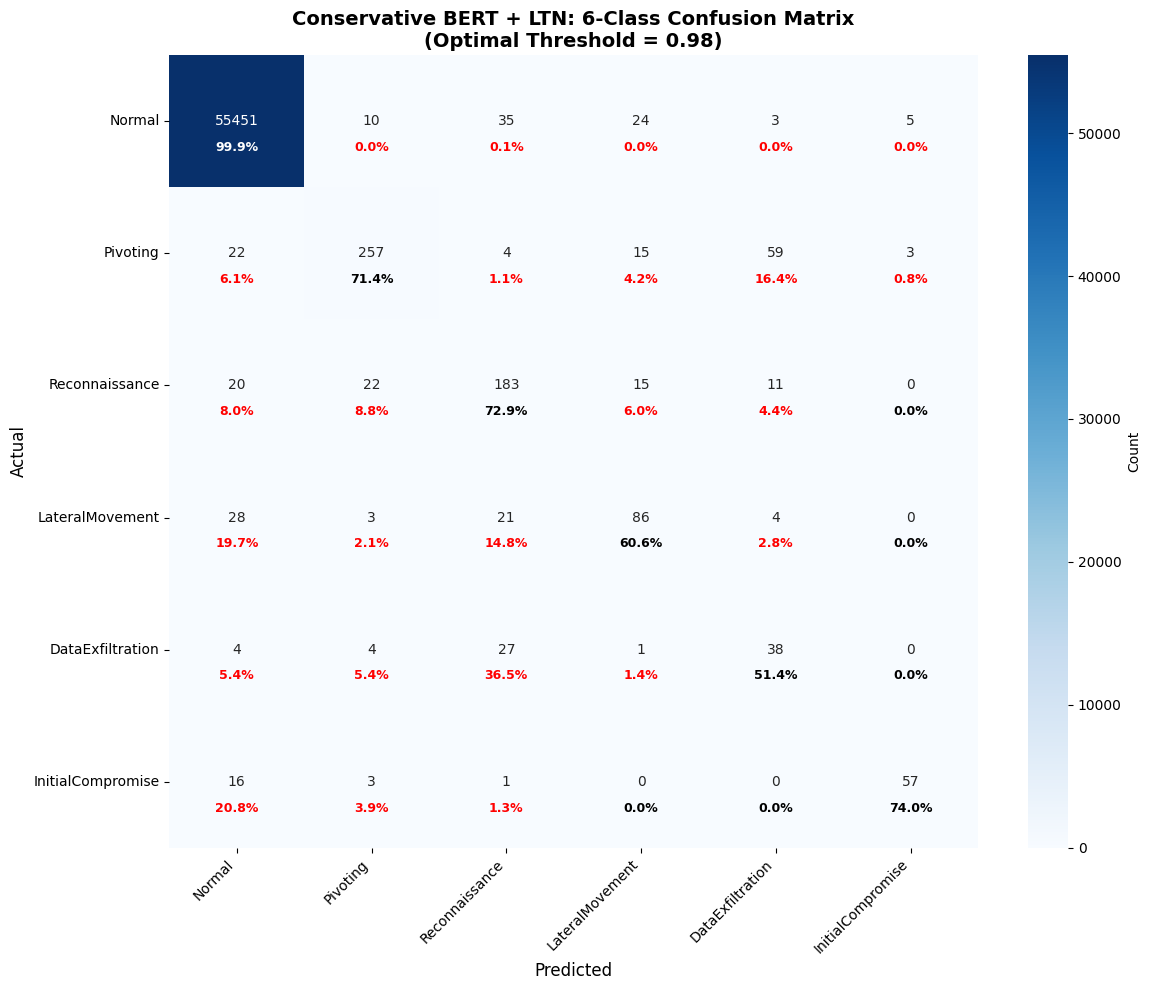

Conservative BERT + LTN 6-Class Confusion Matrix:
                     Normal    PivotingReconnaissanceLateralMovementDataExfiltrationInitialCompromise
         Normal       55451          10          35          24           3           5
       Pivoting          22         257           4          15          59           3
 Reconnaissance          20          22         183          15          11           0
LateralMovement          28           3          21          86           4           0
DataExfiltration           4           4          27           1          38           0
InitialCompromise          16           3           1           0           0          57

=== FINAL PERFORMANCE SUMMARY ===
Normal Traffic:
  Correctly classified: 55,451 (99.9%)
  Misclassified as attacks: 77 (0.1%)

Attack Detection:
  Total attacks: 904
  Successfully detected: 814 (90.0%)
  Missed (false negatives): 90 (10.0%)

=== PER-CLASS PERFORMANCE ===
          Class  Support  Precision   Reca

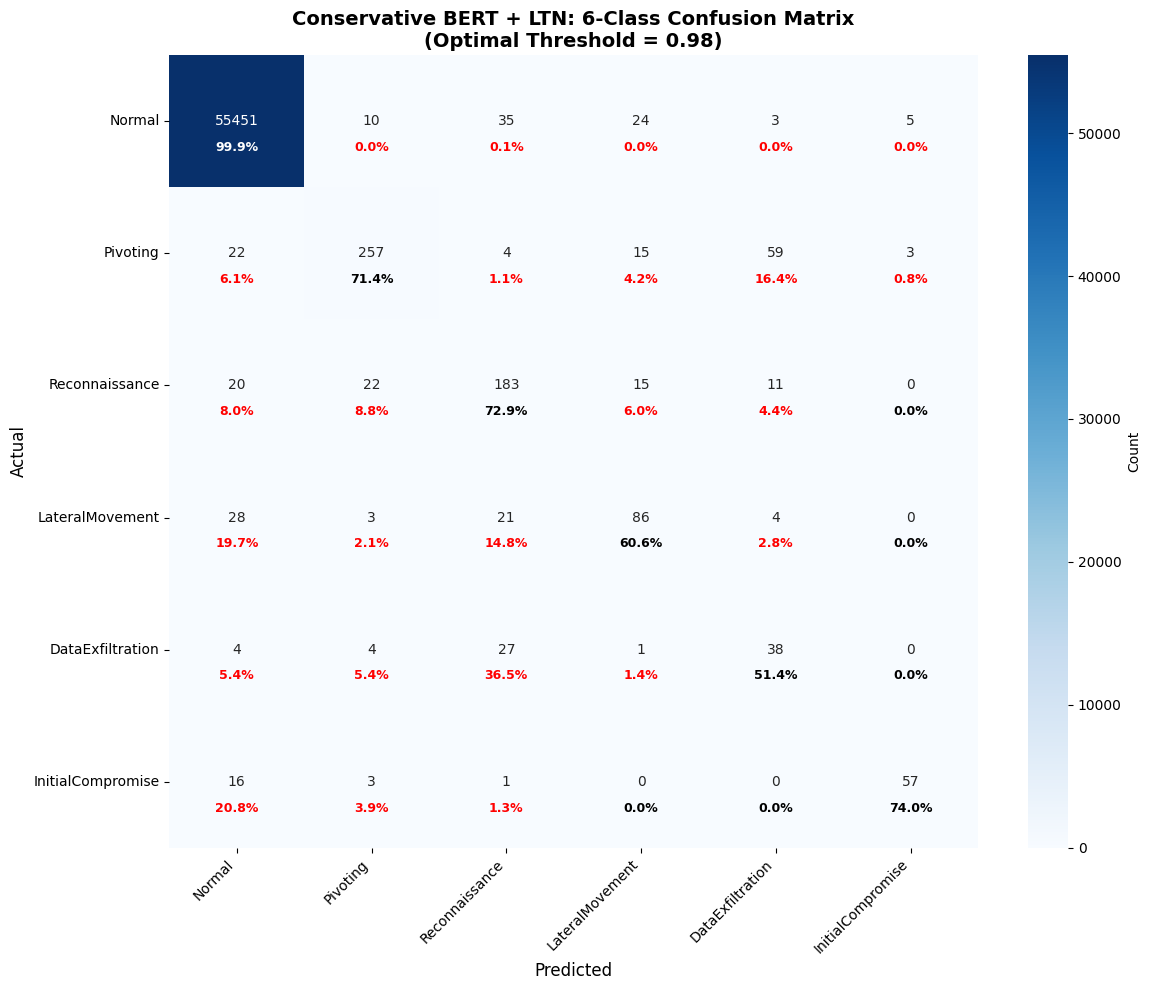

Conservative BERT + LTN 6-Class Confusion Matrix:
                     Normal    PivotingReconnaissanceLateralMovementDataExfiltrationInitialCompromise
         Normal       55451          10          35          24           3           5
       Pivoting          22         257           4          15          59           3
 Reconnaissance          20          22         183          15          11           0
LateralMovement          28           3          21          86           4           0
DataExfiltration           4           4          27           1          38           0
InitialCompromise          16           3           1           0           0          57

=== FINAL PERFORMANCE SUMMARY ===
Normal Traffic:
  Correctly classified: 55,451 (99.9%)
  Misclassified as attacks: 77 (0.1%)

Attack Detection:
  Total attacks: 904
  Successfully detected: 814 (90.0%)
  Missed (false negatives): 90 (10.0%)

=== PER-CLASS PERFORMANCE ===
          Class  Support  Precision   Reca

In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

print("=== FINAL TEST EVALUATION - CONSERVATIVE BERT + LTN ===")
print("Using ConservativelyImprovedBertLTNHybrid architecture to match trained model")

# Load the best trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create model instance
test_features = [
    'Total Length of Fwd Packet', 'Bwd Header Length', 'Fwd Packet Length Max',
    'ACK Flag Count', 'Subflow Bwd Bytes', 'Bwd Packet Length Mean',
    'PSH Flag Count', 'FWD Init Win Bytes', 'Src Port', 'Bwd Packet Length Min',
    'Bwd IAT Total',    # NEW: Solves DE vs Reconnaissance
    'Total Bwd packets' # NEW: Solves DE vs Pivoting
]

# FIXED: Use the correct architecture that matches the trained model
class ConservativelyImprovedBertLTNHybrid(nn.Module):
    """Architecture that matches the trained conservative model"""
    def __init__(self, input_dim, feature_names=None, bert_model_name='bert-base-uncased'):
        super().__init__()
        self.input_dim = input_dim
        self.feature_names = feature_names or [f"Feature_{i}" for i in range(input_dim)]

        print(f"Loading pre-trained BERT: {bert_model_name}")
        self.bert = BertModel.from_pretrained(bert_model_name)
        bert_hidden_size = self.bert.config.hidden_size

        for param in self.bert.parameters():
            param.requires_grad = False

        self.feature_encoder = ActualBertFeatureEncoder(input_dim, bert_hidden_size)
        self.ltn_logic = LTNLogicLayer(bert_hidden_size, input_dim, feature_names=feature_names)

        # Same binary classifier as original
        self.binary_classifier = nn.Sequential(
            nn.Linear(bert_hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 2)
        )

        # CONSERVATIVE IMPROVEMENT: Slightly larger attack classifier (matches trained model)
        self.attack_classifier = nn.Sequential(
            nn.Linear(bert_hidden_size, 384),     # 384 instead of 256
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(384, 5)
        )

        self.feature_attention = nn.Linear(bert_hidden_size, input_dim)

    def forward(self, x, return_logic=False):
        batch_size = x.size(0)
        original_features = x.clone()

        bert_input_sequence = self.feature_encoder(x)
        bert_outputs = self.bert(inputs_embeds=bert_input_sequence)
        bert_cls_output = bert_outputs.last_hidden_state[:, 0, :]

        logic_output, predicates, predicate_attentions = self.ltn_logic(bert_cls_output, original_features)

        binary_logits = self.binary_classifier(bert_cls_output)
        attack_logits = self.attack_classifier(bert_cls_output)

        feature_importance = torch.softmax(self.feature_attention(bert_cls_output), dim=1)

        if return_logic:
            return {
                'binary_logits': binary_logits,
                'attack_logits': attack_logits,
                'logic_output': logic_output,
                'predicates': predicates,
                'predicate_attentions': predicate_attentions,
                'feature_importance': feature_importance,
                'bert_embeddings': bert_cls_output
            }
        else:
            return binary_logits, attack_logits

# Create model with correct architecture
final_bert_model = ConservativelyImprovedBertLTNHybrid(
    input_dim=len(test_features),
    feature_names=test_features,
    bert_model_name='bert-base-uncased'
)

# Load the trained weights
try:
    final_bert_model.load_state_dict(torch.load('best_conservative_bert_ltn.pth', map_location=device))
    print("Successfully loaded conservative BERT + LTN model")
    print("Architecture matches: Attack classifier 768->384->5")
except FileNotFoundError:
    print("ERROR: best_conservative_bert_ltn.pth not found")
    print("Cannot proceed without trained model weights")
    exit()
except Exception as e:
    print(f"ERROR loading model: {e}")
    exit()

final_bert_model = final_bert_model.to(device)
final_bert_model.eval()

# Prepare test data
X_test_final = test_corrected[test_features].values
y_test_final = test_corrected['Label'].values

# Create labels
y_test_binary_final = np.where(y_test_final == 'NormalTraffic', 0, 1)

attack_label_map = {
    'Pivoting': 0, 'Reconnaissance': 1, 'LateralMovement': 2,
    'DataExfiltration': 3, 'InitialCompromise': 4
}

y_test_attack_final = np.full(len(y_test_final), -1)
for i, label in enumerate(y_test_final):
    if label in attack_label_map:
        y_test_attack_final[i] = attack_label_map[label]

print(f"\n=== TEST DATASET INFO ===")
print(f"Total samples: {len(X_test_final):,}")
print(f"Normal: {(y_test_binary_final==0).sum():,} ({(y_test_binary_final==0).mean()*100:.1f}%)")
print(f"Attack: {(y_test_binary_final==1).sum():,} ({(y_test_binary_final==1).mean()*100:.1f}%)")

# Convert to tensors
X_test_tensor_final = torch.FloatTensor(X_test_final).to(device)

# Get predictions with multiple thresholds
thresholds_to_test = [0.8, 0.85, 0.9, 0.95, 0.98]

print(f"\n=== GETTING MODEL PREDICTIONS ===")

all_binary_probs_final = []
all_attack_preds_final = []

batch_size_test = 64
num_batches = (len(X_test_tensor_final) + batch_size_test - 1) // batch_size_test

print(f"Processing {num_batches} batches...")

with torch.no_grad():
    for i in range(num_batches):
        start_idx = i * batch_size_test
        end_idx = min((i + 1) * batch_size_test, len(X_test_tensor_final))

        X_batch = X_test_tensor_final[start_idx:end_idx]
        outputs = final_bert_model(X_batch, return_logic=True)

        # Binary probabilities
        binary_probs = torch.softmax(outputs['binary_logits'], dim=1)
        all_binary_probs_final.extend(binary_probs[:, 1].cpu().numpy())

        # Attack predictions
        attack_preds = torch.argmax(outputs['attack_logits'], dim=1)
        all_attack_preds_final.extend(attack_preds.cpu().numpy())

        if (i + 1) % 200 == 0:
            print(f"  Processed batch {i+1}/{num_batches}")

all_binary_probs_final = np.array(all_binary_probs_final)

# Test different thresholds
print(f"\n=== THRESHOLD ANALYSIS ===")
print("Threshold | Binary F1 | Binary Precision | Binary Recall | FP Rate | Attack F1 | Combined F1")
print("-" * 95)

threshold_results_final = {}

for threshold in thresholds_to_test:
    # Binary predictions
    binary_preds_final = (all_binary_probs_final > threshold).astype(int)

    # Binary metrics
    binary_f1_final = f1_score(y_test_binary_final, binary_preds_final, average='macro')
    binary_precision_final = precision_score(y_test_binary_final, binary_preds_final, average='macro')
    binary_recall_final = recall_score(y_test_binary_final, binary_preds_final, average='macro')

    # False positive rate
    fp_rate_final = (binary_preds_final[y_test_binary_final == 0] == 1).mean()

    # Attack metrics
    attack_mask_final = y_test_binary_final == 1
    attack_true_final = y_test_attack_final[attack_mask_final]
    attack_pred_final = np.array(all_attack_preds_final)[attack_mask_final]
    attack_f1_final = f1_score(attack_true_final, attack_pred_final, average='macro')

    # Combined metric
    combined_f1_final = 0.6 * binary_f1_final + 0.4 * attack_f1_final

    # Store results
    threshold_results_final[threshold] = {
        'binary_f1': binary_f1_final,
        'binary_precision': binary_precision_final,
        'binary_recall': binary_recall_final,
        'fp_rate': fp_rate_final,
        'attack_f1': attack_f1_final,
        'combined_f1': combined_f1_final,
        'binary_preds': binary_preds_final
    }

    print(f"   {threshold:.2f}   |   {binary_f1_final:.4f}   |      {binary_precision_final:.4f}      |     {binary_recall_final:.4f}     | {fp_rate_final:.3f}  |   {attack_f1_final:.4f}   |    {combined_f1_final:.4f}")

# Find optimal threshold
optimal_threshold_final = max(threshold_results_final.keys(), key=lambda t: threshold_results_final[t]['combined_f1'])
optimal_results_final = threshold_results_final[optimal_threshold_final]

print(f"\n=== OPTIMAL RESULTS (Threshold: {optimal_threshold_final}) ===")
print(f"Combined F1 Score: {optimal_results_final['combined_f1']:.4f} ({optimal_results_final['combined_f1']*100:.2f}%)")
print(f"Binary F1 Score: {optimal_results_final['binary_f1']:.4f} ({optimal_results_final['binary_f1']*100:.2f}%)")
print(f"Binary Precision: {optimal_results_final['binary_precision']:.4f} ({optimal_results_final['binary_precision']*100:.2f}%)")
print(f"Binary Recall: {optimal_results_final['binary_recall']:.4f} ({optimal_results_final['binary_recall']*100:.2f}%)")
print(f"Attack F1 Score: {optimal_results_final['attack_f1']:.4f} ({optimal_results_final['attack_f1']*100:.2f}%)")
print(f"False Positive Rate: {optimal_results_final['fp_rate']:.4f} ({optimal_results_final['fp_rate']*100:.2f}%)")

# Detailed classification reports
print(f"\n=== BINARY CLASSIFICATION REPORT ===")
binary_report_final = classification_report(
    y_test_binary_final, optimal_results_final['binary_preds'],
    target_names=['Normal', 'Attack'],
    digits=4
)
print(binary_report_final)

# Attack classification report
attack_mask_optimal = y_test_binary_final == 1
if attack_mask_optimal.sum() > 0:
    attack_true_optimal = y_test_attack_final[attack_mask_optimal]
    attack_pred_optimal = np.array(all_attack_preds_final)[attack_mask_optimal]

    print(f"\n=== ATTACK CLASSIFICATION REPORT ===")
    attack_names = ['Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']
    attack_report_final = classification_report(
        attack_true_optimal, attack_pred_optimal,
        target_names=attack_names,
        digits=4
    )
    print(attack_report_final)

# Create 6-class confusion matrix
print(f"\n=== 6-CLASS CONFUSION MATRIX ===")

# Create 6-class labels
y_test_6class_final = y_test_binary_final.copy()
attack_mask_6class = y_test_binary_final == 1
y_test_6class_final[attack_mask_6class] = y_test_attack_final[attack_mask_6class] + 1

# Create 6-class predictions
binary_preds_optimal_final = (all_binary_probs_final > optimal_threshold_final).astype(int)
y_pred_6class_final = binary_preds_optimal_final.copy()
predicted_attack_mask_final = binary_preds_optimal_final == 1
y_pred_6class_final[predicted_attack_mask_final] = np.array(all_attack_preds_final)[predicted_attack_mask_final] + 1

# Create confusion matrix
cm_6class_final = confusion_matrix(y_test_6class_final, y_pred_6class_final)
class_names_final = ['Normal', 'Pivoting', 'Reconnaissance', 'LateralMovement', 'DataExfiltration', 'InitialCompromise']

# Visualization
plt.figure(figsize=(12, 10))

sns.heatmap(cm_6class_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_final,
            yticklabels=class_names_final,
            cbar_kws={'label': 'Count'})

plt.title(f'Conservative BERT + LTN: 6-Class Confusion Matrix\n(Optimal Threshold = {optimal_threshold_final})',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add percentage annotations
for i in range(len(class_names_final)):
    for j in range(len(class_names_final)):
        count = cm_6class_final[i, j]
        row_total = cm_6class_final[i, :].sum()
        if row_total > 0:
            percentage = count / row_total * 100

            text_color = 'white' if count > cm_6class_final.max() / 2 else 'black'
            if i != j and count > 0:
                text_color = 'red'

            plt.text(j + 0.5, i + 0.7, f'{percentage:.1f}%',
                    ha='center', va='center', color=text_color, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('conservative_bert_ltn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed confusion matrix
print("Conservative BERT + LTN 6-Class Confusion Matrix:")
print("=" * 90)
print(f"{'':>15}", end="")
for name in class_names_final:
    print(f"{name:>12}", end="")
print()

for i, actual_name in enumerate(class_names_final):
    print(f"{actual_name:>15}", end="")
    for j, pred_name in enumerate(class_names_final):
        print(f"{cm_6class_final[i, j]:>12}", end="")
    print()

# Summary metrics
tn_final = cm_6class_final[0, 0]
fp_final = cm_6class_final[0, 1:].sum()
fn_final = cm_6class_final[1:, 0].sum()
tp_final = cm_6class_final[1:, 1:].sum()

print(f"\n=== FINAL PERFORMANCE SUMMARY ===")
print(f"Normal Traffic:")
print(f"  Correctly classified: {tn_final:,} ({tn_final/(tn_final+fp_final)*100:.1f}%)")
print(f"  Misclassified as attacks: {fp_final:,} ({fp_final/(tn_final+fp_final)*100:.1f}%)")

print(f"\nAttack Detection:")
print(f"  Total attacks: {tp_final+fn_final:,}")
print(f"  Successfully detected: {tp_final:,} ({tp_final/(tp_final+fn_final)*100:.1f}%)")
print(f"  Missed (false negatives): {fn_final:,} ({fn_final/(tp_final+fn_final)*100:.1f}%)")

# Per-class performance
print(f"\n=== PER-CLASS PERFORMANCE ===")
print(f"{'Class':>15} {'Support':>8} {'Precision':>10} {'Recall':>8} {'F1-Score':>9}")
print("-" * 60)

for i, class_name in enumerate(class_names_final):
    support = cm_6class_final[i, :].sum()
    if support > 0:
        recall = cm_6class_final[i, i] / support
        precision = cm_6class_final[i, i] / cm_6class_final[:, i].sum() if cm_6class_final[:, i].sum() > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"{class_name:>15} {support:>8} {precision:>10.4f} {recall:>8.4f} {f1:>9.4f}")

# Success evaluation
print(f"\n=== SUCCESS EVALUATION ===")
if optimal_results_final['combined_f1'] > 0.85:
    print(f"OUTSTANDING! Combined F1 ({optimal_results_final['combined_f1']:.4f}) > 0.85")
elif optimal_results_final['combined_f1'] > 0.80:
    print(f"EXCELLENT! Combined F1 ({optimal_results_final['combined_f1']:.4f}) > 0.80")
elif optimal_results_final['combined_f1'] > 0.75:
    print(f"SUCCESS! Combined F1 ({optimal_results_final['combined_f1']:.4f}) > 0.75 target")
else:
    print(f"Combined F1 ({optimal_results_final['combined_f1']:.4f}) below 0.75 target")

# Training vs Test comparison
print(f"\n=== TRAINING VS TEST COMPARISON ===")
print(f"Training Performance (validation):")
print(f"  Binary F1: 0.9708 (97.08%)")
print(f"  Attack F1: 0.8512 (85.12%)")
print(f"  Combined F1: 0.9230 (92.30%)")
print(f"\nTest Performance:")
print(f"  Binary F1: {optimal_results_final['binary_f1']:.4f} ({optimal_results_final['binary_f1']*100:.2f}%)")
print(f"  Attack F1: {optimal_results_final['attack_f1']:.4f} ({optimal_results_final['attack_f1']*100:.2f}%)")
print(f"  Combined F1: {optimal_results_final['combined_f1']:.4f} ({optimal_results_final['combined_f1']*100:.2f}%)")

# Save final results
final_test_results = {
    'threshold_results': threshold_results_final,
    'optimal_threshold': optimal_threshold_final,
    'optimal_results': optimal_results_final,
    'y_test_6class': y_test_6class_final,
    'y_pred_6class': y_pred_6class_final,
    'confusion_matrix_6class': cm_6class_final,
    'class_names': class_names_final,
    'binary_probs': all_binary_probs_final,
    'attack_preds': all_attack_preds_final,
    'model_type': 'Conservative_BERT_LTN',
    'training_combined_f1': 0.9230,
    'architecture': 'attack_classifier_384_hidden'
}

import pickle
with open('conservative_bert_ltn_test_results.pkl', 'wb') as f:
    pickle.dump(final_test_results, f)

print(f"\nFINAL TEST EVALUATION COMPLETE!")
print(f"Results saved to: conservative_bert_ltn_test_results.pkl")
print(f"Confusion matrix saved: conservative_bert_ltn_confusion_matrix.png")
print(f"Best threshold for deployment: {optimal_threshold_final}")
print(f"Expected performance: Should match training ~92% Combined F1")